# Metrics:
- clDice, network analysis (whole skeleton)
- kdTrees: (gt vs UNET)
    - Matchings
    - Dice
- Network analysis (inside gt/UNET)
    - network analysis

# Network analysis (whole volume)

Number of nodes: 134416
Number of edges: 143888
Average degree: 2.14
Number of branch points: 10926
Number of endpoints: 4558


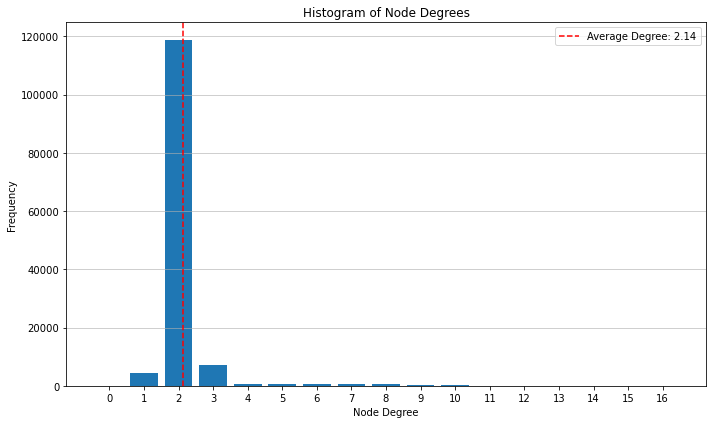

Degree 0: 41 nodes
Degree 1: 4558 nodes
Degree 2: 118891 nodes
Degree 3: 7274 nodes
Degree 4: 732 nodes
Degree 5: 600 nodes
Degree 6: 518 nodes
Degree 7: 784 nodes
Degree 8: 565 nodes
Degree 9: 185 nodes
Degree 10: 128 nodes
Degree 11: 84 nodes
Degree 12: 35 nodes
Degree 13: 16 nodes
Degree 14: 3 nodes
Degree 15: 1 nodes
Degree 16: 1 nodes


In [2]:
import numpy as np
import tifffile
from skimage.morphology import skeletonize_3d
import networkx as nx
from scipy import ndimage
import matplotlib.pyplot as plt

# Load or generate the skeleton
skeleton_file = '../23-oct/skeleton_gtchunks.tif'
skeleton = tifffile.imread(skeleton_file)
skeleton = skeleton > 0  # Ensure it's binary

# Function to get neighbors
def get_neighbors(point, shape):
    neighbors = []
    for x in range(max(0, point[0]-1), min(point[0]+2, shape[0])):
        for y in range(max(0, point[1]-1), min(point[1]+2, shape[1])):
            for z in range(max(0, point[2]-1), min(point[2]+2, shape[2])):
                if (x, y, z) != point:
                    neighbors.append((x, y, z))
    return neighbors

# Create a graph from the skeleton
G = nx.Graph()

# Add nodes
for point in np.argwhere(skeleton):
    G.add_node(tuple(point))

# Add edges
for node in G.nodes():
    for neighbor in get_neighbors(node, skeleton.shape):
        if skeleton[neighbor]:
            G.add_edge(node, neighbor)

# Calculate average degree
degrees = [d for n, d in G.degree()]
average_degree = sum(degrees) / len(G)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average degree: {average_degree:.2f}")

# Identify branch points and endpoints
branch_points = [node for node, degree in G.degree() if degree > 2]
endpoints = [node for node, degree in G.degree() if degree == 1]

print(f"Number of branch points: {len(branch_points)}")
print(f"Number of endpoints: {len(endpoints)}")

# Create a histogram of node degrees
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2, 1), align='left', rwidth=0.8)
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.title('Histogram of Node Degrees')
plt.xticks(range(min(degrees), max(degrees) + 1))
plt.grid(axis='y', alpha=0.75)

# Add a vertical line for the average degree
plt.axvline(x=average_degree, color='r', linestyle='--', label=f'Average Degree: {average_degree:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# Print degree distribution
degree_counts = nx.degree_histogram(G)
for degree, count in enumerate(degree_counts):
    if count > 0:
        print(f"Degree {degree}: {count} nodes")

Number of nodes: 237592
Number of edges: 465965
Average degree: 3.92
Number of branch points: 84829
Number of endpoints: 12918


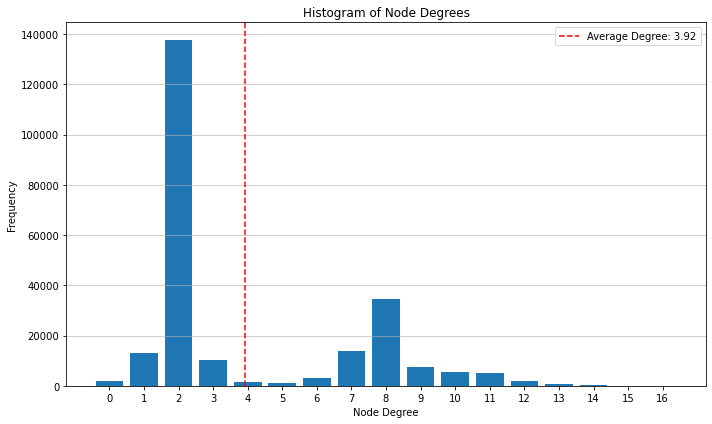

Degree 0: 2016 nodes
Degree 1: 12918 nodes
Degree 2: 137829 nodes
Degree 3: 10361 nodes
Degree 4: 1419 nodes
Degree 5: 946 nodes
Degree 6: 3213 nodes
Degree 7: 13708 nodes
Degree 8: 34626 nodes
Degree 9: 7461 nodes
Degree 10: 5450 nodes
Degree 11: 4988 nodes
Degree 12: 1745 nodes
Degree 13: 667 nodes
Degree 14: 191 nodes
Degree 15: 43 nodes
Degree 16: 11 nodes


In [1]:
import numpy as np
import tifffile
from skimage.morphology import skeletonize_3d
import networkx as nx
from scipy import ndimage
import matplotlib.pyplot as plt

# Load or generate the skeleton
skeleton_file = '../23-oct/skeleton_unet.tif'
skeleton = tifffile.imread(skeleton_file)
skeleton = skeleton > 0  # Ensure it's binary

# Function to get neighbors
def get_neighbors(point, shape):
    neighbors = []
    for x in range(max(0, point[0]-1), min(point[0]+2, shape[0])):
        for y in range(max(0, point[1]-1), min(point[1]+2, shape[1])):
            for z in range(max(0, point[2]-1), min(point[2]+2, shape[2])):
                if (x, y, z) != point:
                    neighbors.append((x, y, z))
    return neighbors

# Create a graph from the skeleton
G = nx.Graph()

# Add nodes
for point in np.argwhere(skeleton):
    G.add_node(tuple(point))

# Add edges
for node in G.nodes():
    for neighbor in get_neighbors(node, skeleton.shape):
        if skeleton[neighbor]:
            G.add_edge(node, neighbor)

# Calculate average degree
degrees = [d for n, d in G.degree()]
average_degree = sum(degrees) / len(G)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average degree: {average_degree:.2f}")

# Identify branch points and endpoints
branch_points = [node for node, degree in G.degree() if degree > 2]
endpoints = [node for node, degree in G.degree() if degree == 1]

print(f"Number of branch points: {len(branch_points)}")
print(f"Number of endpoints: {len(endpoints)}")

# Create a histogram of node degrees
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2, 1), align='left', rwidth=0.8)
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.title('Histogram of Node Degrees')
plt.xticks(range(min(degrees), max(degrees) + 1))
plt.grid(axis='y', alpha=0.75)

# Add a vertical line for the average degree
plt.axvline(x=average_degree, color='r', linestyle='--', label=f'Average Degree: {average_degree:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# Print degree distribution
degree_counts = nx.degree_histogram(G)
for degree, count in enumerate(degree_counts):
    if count > 0:
        print(f"Degree {degree}: {count} nodes")

Ground truth skeleton
Total number of nodes: 134416
Number of degree-2 nodes: 118891
Percentage of degree-2 nodes: 88.45%
Number of non-degree-2 nodes: 15525
Average degree (excluding degree-2 nodes): 3.22


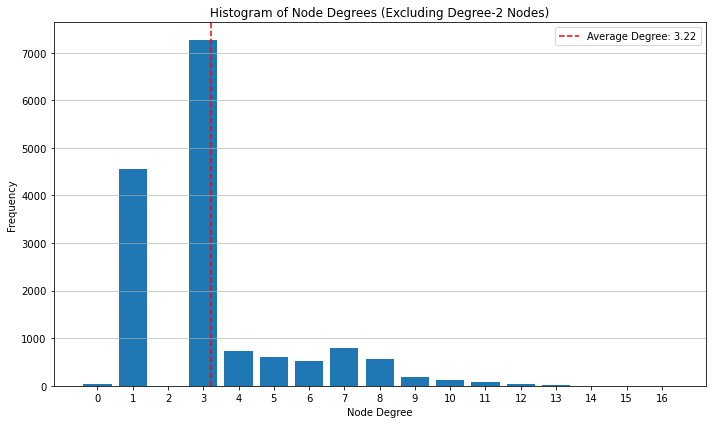

Degree 0: 41 nodes
Degree 1: 4558 nodes
Degree 3: 7274 nodes
Degree 4: 732 nodes
Degree 5: 600 nodes
Degree 6: 518 nodes
Degree 7: 784 nodes
Degree 8: 565 nodes
Degree 9: 185 nodes
Degree 10: 128 nodes
Degree 11: 84 nodes
Degree 12: 35 nodes
Degree 13: 16 nodes
Degree 14: 3 nodes
Degree 15: 1 nodes
Degree 16: 1 nodes


In [2]:
import numpy as np
import tifffile
import networkx as nx
import matplotlib.pyplot as plt

# Load the skeleton
skeleton_file = '../23-oct/skeleton_gtchunks.tif'
print('Ground truth skeleton')
skeleton = tifffile.imread(skeleton_file)
skeleton = skeleton > 0  # Ensure it's binary

def get_neighbors(point, shape):
    neighbors = []
    for x in range(max(0, point[0]-1), min(point[0]+2, shape[0])):
        for y in range(max(0, point[1]-1), min(point[1]+2, shape[1])):
            for z in range(max(0, point[2]-1), min(point[2]+2, shape[2])):
                if (x, y, z) != point:
                    neighbors.append((x, y, z))
    return neighbors

# Create a graph from the skeleton
G = nx.Graph()

# Add nodes and edges
for point in np.argwhere(skeleton):
    G.add_node(tuple(point))
    for neighbor in get_neighbors(tuple(point), skeleton.shape):
        if skeleton[neighbor]:
            G.add_edge(tuple(point), neighbor)

# Calculate degrees for all nodes
all_degrees = dict(G.degree())

# Separate degree-2 nodes and other nodes
degree_2_nodes = [n for n, d in all_degrees.items() if d == 2]
non_degree_2_nodes = [n for n, d in all_degrees.items() if d != 2]

# Calculate statistics
total_nodes = G.number_of_nodes()
num_degree_2_nodes = len(degree_2_nodes)
num_non_degree_2_nodes = len(non_degree_2_nodes)
percentage_degree_2 = (num_degree_2_nodes / total_nodes) * 100

print(f"Total number of nodes: {total_nodes}")
print(f"Number of degree-2 nodes: {num_degree_2_nodes}")
print(f"Percentage of degree-2 nodes: {percentage_degree_2:.2f}%")
print(f"Number of non-degree-2 nodes: {num_non_degree_2_nodes}")

if non_degree_2_nodes:
    non_degree_2_degrees = [all_degrees[n] for n in non_degree_2_nodes]
    average_degree = sum(non_degree_2_degrees) / len(non_degree_2_degrees)
    print(f"Average degree (excluding degree-2 nodes): {average_degree:.2f}")

    # Create a histogram of node degrees, excluding degree-2 nodes
    plt.figure(figsize=(10, 6))
    plt.hist(non_degree_2_degrees, bins=range(min(non_degree_2_degrees), max(non_degree_2_degrees) + 2, 1), align='left', rwidth=0.8)
    plt.xlabel('Node Degree')
    plt.ylabel('Frequency')
    plt.title('Histogram of Node Degrees (Excluding Degree-2 Nodes)')
    plt.xticks(range(min(non_degree_2_degrees), max(non_degree_2_degrees) + 1))
    plt.grid(axis='y', alpha=0.75)

    # Add a vertical line for the average degree
    plt.axvline(x=average_degree, color='r', linestyle='--', label=f'Average Degree: {average_degree:.2f}')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print degree distribution (excluding degree-2)
    degree_counts = {}
    for degree in non_degree_2_degrees:
        if degree not in degree_counts:
            degree_counts[degree] = 1
        else:
            degree_counts[degree] += 1

    for degree, count in sorted(degree_counts.items()):
        print(f"Degree {degree}: {count} nodes")
else:
    print("No non-degree-2 nodes found in the graph.")

UNET skeleton
Total number of nodes: 237592
Number of degree-2 nodes: 137829
Percentage of degree-2 nodes: 58.01%
Number of non-degree-2 nodes: 99763
Average degree (excluding degree-2 nodes): 6.58


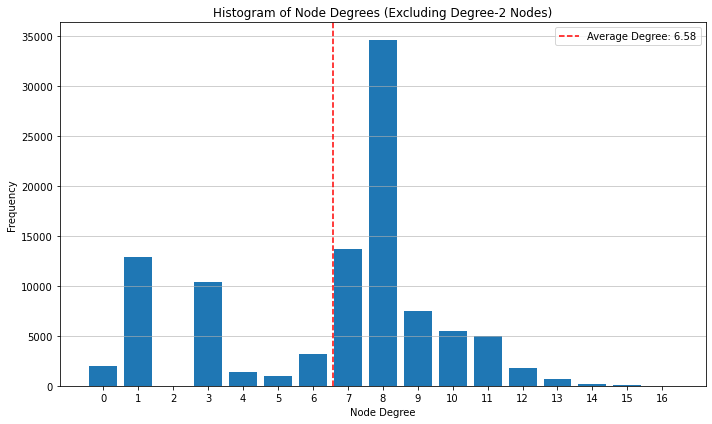

Degree 0: 2016 nodes
Degree 1: 12918 nodes
Degree 3: 10361 nodes
Degree 4: 1419 nodes
Degree 5: 946 nodes
Degree 6: 3213 nodes
Degree 7: 13708 nodes
Degree 8: 34626 nodes
Degree 9: 7461 nodes
Degree 10: 5450 nodes
Degree 11: 4988 nodes
Degree 12: 1745 nodes
Degree 13: 667 nodes
Degree 14: 191 nodes
Degree 15: 43 nodes
Degree 16: 11 nodes


In [3]:
import numpy as np
import tifffile
import networkx as nx
import matplotlib.pyplot as plt

# Load the skeleton
skeleton_file = '../23-oct/skeleton_unet.tif'
print('UNET skeleton')
skeleton = tifffile.imread(skeleton_file)
skeleton = skeleton > 0  # Ensure it's binary

def get_neighbors(point, shape):
    neighbors = []
    for x in range(max(0, point[0]-1), min(point[0]+2, shape[0])):
        for y in range(max(0, point[1]-1), min(point[1]+2, shape[1])):
            for z in range(max(0, point[2]-1), min(point[2]+2, shape[2])):
                if (x, y, z) != point:
                    neighbors.append((x, y, z))
    return neighbors

# Create a graph from the skeleton
G = nx.Graph()

# Add nodes and edges
for point in np.argwhere(skeleton):
    G.add_node(tuple(point))
    for neighbor in get_neighbors(tuple(point), skeleton.shape):
        if skeleton[neighbor]:
            G.add_edge(tuple(point), neighbor)

# Calculate degrees for all nodes
all_degrees = dict(G.degree())

# Separate degree-2 nodes and other nodes
degree_2_nodes = [n for n, d in all_degrees.items() if d == 2]
non_degree_2_nodes = [n for n, d in all_degrees.items() if d != 2]

# Calculate statistics
total_nodes = G.number_of_nodes()
num_degree_2_nodes = len(degree_2_nodes)
num_non_degree_2_nodes = len(non_degree_2_nodes)
percentage_degree_2 = (num_degree_2_nodes / total_nodes) * 100

print(f"Total number of nodes: {total_nodes}")
print(f"Number of degree-2 nodes: {num_degree_2_nodes}")
print(f"Percentage of degree-2 nodes: {percentage_degree_2:.2f}%")
print(f"Number of non-degree-2 nodes: {num_non_degree_2_nodes}")

if non_degree_2_nodes:
    non_degree_2_degrees = [all_degrees[n] for n in non_degree_2_nodes]
    average_degree = sum(non_degree_2_degrees) / len(non_degree_2_degrees)
    print(f"Average degree (excluding degree-2 nodes): {average_degree:.2f}")

    # Create a histogram of node degrees, excluding degree-2 nodes
    plt.figure(figsize=(10, 6))
    plt.hist(non_degree_2_degrees, bins=range(min(non_degree_2_degrees), max(non_degree_2_degrees) + 2, 1), align='left', rwidth=0.8)
    plt.xlabel('Node Degree')
    plt.ylabel('Frequency')
    plt.title('Histogram of Node Degrees (Excluding Degree-2 Nodes)')
    plt.xticks(range(min(non_degree_2_degrees), max(non_degree_2_degrees) + 1))
    plt.grid(axis='y', alpha=0.75)

    # Add a vertical line for the average degree
    plt.axvline(x=average_degree, color='r', linestyle='--', label=f'Average Degree: {average_degree:.2f}')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print degree distribution (excluding degree-2)
    degree_counts = {}
    for degree in non_degree_2_degrees:
        if degree not in degree_counts:
            degree_counts[degree] = 1
        else:
            degree_counts[degree] += 1

    for degree, count in sorted(degree_counts.items()):
        print(f"Degree {degree}: {count} nodes")
else:
    print("No non-degree-2 nodes found in the graph.")

## clDICE (Centerline Dice, paper neurons)  (WHOLE SKELETON)

https://openaccess.thecvf.com/content/WACV2024/papers/Shamsi_Improved_Topological_Preservation_in_3D_Axon_Segmentation_and_Centerline_Detection_WACV_2024_paper.pdf​

In [1]:
import numpy as np
import tifffile
from skimage.morphology import skeletonize_3d

def tprec(skeleton_pred, volume_gt):
    return np.sum(skeleton_pred * volume_gt) / np.sum(skeleton_pred)

def tsens(skeleton_gt, volume_pred):
    return np.sum(skeleton_gt * volume_pred) / np.sum(skeleton_gt)

def cldice(volume_pred, volume_gt, skeleton_pred, skeleton_gt):
    tp = tprec(skeleton_pred, volume_gt)
    ts = tsens(skeleton_gt, volume_pred)
    return 2 * tp * ts / (tp + ts)

In [2]:
# Load the predicted volume and its skeleton
volume_pred = tifffile.imread("../23-oct/hoa_big/hoa/V_unet_test.tif")
skeleton_pred = tifffile.imread('../23-oct/skeleton_unet.tif')

# Load the ground truth volume and its skeleton
volume_gt = tifffile.imread("../23-oct/hoa_big/hoa/V_ref_test.tif")
skeleton_gt = tifffile.imread('../23-oct/skeleton_gtchunks.tif')

# Ensure all inputs are binary
volume_pred = volume_pred > 0
skeleton_pred = skeleton_pred > 0
volume_gt = volume_gt > 0
skeleton_gt = skeleton_gt > 0

# Compute clDice
cldice_score = cldice(volume_pred, volume_gt, skeleton_pred, skeleton_gt)

print(f"clDice score: {cldice_score}")

clDice score: 0.815877534547327


------------------------------------------------

## METRICS FOR A PIECE OF THE SKELETON

## BOTTOM 
--------------------------------------------------------------------------------------------------

### ckdTree > clDice (no tol)

In [5]:
import numpy as np
import tifffile
from scipy.spatial import cKDTree
import pandas as pd

def load_skeleton(skeleton_path):
    """Load the skeleton from a TIFF file."""
    skeleton = tifffile.imread(skeleton_path)
    skeleton = skeleton > 0  # Ensure it's binary
    return np.argwhere(skeleton)

def find_nearest_neighbors(points1, points2):
    """Find nearest neighbors from points1 to points2."""
    tree2 = cKDTree(points2)
    distances, indices = tree2.query(points1)
    return distances, indices

def calculate_dice(points1, points2):
    """Calculate the Dice coefficient between two sets of points."""
    # Find nearest neighbors
    distances12, indices12 = find_nearest_neighbors(points1, points2)
    distances21, indices21 = find_nearest_neighbors(points2, points1)

    # Count matchings
    matchings = sum(1 for i, idx in enumerate(indices12) if indices21[idx] == i)

    # Calculate Dice coefficient
    dice_coefficient = (2 * matchings) / (len(points1) + len(points2)) if (len(points1) + len(points2)) > 0 else 0
    return matchings, dice_coefficient

def analyze_skeletons(skeleton1_path, skeleton2_path):
    """Analyze two skeletons and compute matching metrics."""
    # Load skeletons
    points1 = load_skeleton(skeleton1_path)
    points2 = load_skeleton(skeleton2_path)

    # Check if points were loaded correctly
    print(f"Skeleton 1 has {len(points1)} points.")
    print(f"Skeleton 2 has {len(points2)} points.")

    # Determine which skeleton to use as reference
    if len(points1) < len(points2):
        reference_points = points1
        comparison_points = points2
        reference_name = "Skeleton 1"
        comparison_name = "Skeleton 2"
    else:
        reference_points = points2
        comparison_points = points1
        reference_name = "Skeleton 2"
        comparison_name = "Skeleton 1"

    # Find nearest neighbors
    distances_ref_to_comp, indices_ref_to_comp = find_nearest_neighbors(reference_points, comparison_points)
    distances_comp_to_ref, indices_comp_to_ref = find_nearest_neighbors(comparison_points, reference_points)

    # Count matchings
    matchings = sum(1 for i, idx in enumerate(indices_ref_to_comp) if indices_comp_to_ref[idx] == i)

    # Calculate average distance
    avg_distance_ref_to_comp = np.mean(distances_ref_to_comp) if len(distances_ref_to_comp) > 0 else float('nan')
    avg_distance_comp_to_ref = np.mean(distances_comp_to_ref) if len(distances_comp_to_ref) > 0 else float('nan')

    # Calculate percentage of matchings based on reference and comparison skeletons
    percentage_matchings_ref = (matchings / len(reference_points)) * 100 if len(reference_points) > 0 else 0
    percentage_matchings_comp = (matchings / len(comparison_points)) * 100 if len(comparison_points) > 0 else 0

    # Calculate Dice coefficient
    dice_coefficient = calculate_dice(points1, points2)[1]

    # Find matching indices
    matching_indices = [i for i, idx in enumerate(indices_ref_to_comp) if indices_comp_to_ref[idx] == i]

    # Calculate distances between matched points
    matching_distances = [np.linalg.norm(points1[i] - points2[indices_ref_to_comp[i]]) for i in matching_indices]

    # Average distance of matched points
    avg_matching_distance = np.mean(matching_distances) if matching_distances else float('nan')

    return {
        "Reference Skeleton": reference_name,
        "Comparison Skeleton": comparison_name,
        "Number of Matchings": matchings,
        "Percentage of Matchings (Ref)": percentage_matchings_ref,
        "Percentage of Matchings (Comp)": percentage_matchings_comp,
        "Average Distance (Ref to Comp)": avg_distance_ref_to_comp,
        "Average Distance (Comp to Ref)": avg_distance_comp_to_ref,
        "Dice Coefficient": dice_coefficient,
        "Average Matching Distance": avg_matching_distance,
    }

In [6]:
# Main analysis function to gather results into a DataFrame
def main():
    results = []
    
    # Example paths for analysis; replace with your actual paths or loop through multiple files.
    analyses_paths = [
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/output_volume_smaller_skeleton_UNET_BOTTOM.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/baseline_gt_UNET_BOTTOM.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/skeleleton_clean_x20_th5_UNET_BOTTOM.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/dilated_volume_skeleton_UNET_BOTTOM.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/connected_blobs_UNET_BOTTOM.tif"),
    ]

    for path1, path2 in analyses_paths:
        result = analyze_skeletons(path1, path2)
        results.append(result)

    # Create a DataFrame from the results and display it as a table
    df_results = pd.DataFrame(results)
    
    print("\nAnalysis Results:")
    print(df_results)

# Example usage
if __name__ == "__main__":
    main()

Skeleton 1 has 326 points.
Skeleton 2 has 2731 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1213 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1329 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1281 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1704 points.

Analysis Results:
  Reference Skeleton Comparison Skeleton  Number of Matchings  \
0         Skeleton 1          Skeleton 2                  188   
1         Skeleton 1          Skeleton 2                  138   
2         Skeleton 1          Skeleton 2                  150   
3         Skeleton 1          Skeleton 2                  168   
4         Skeleton 1          Skeleton 2                  160   

   Percentage of Matchings (Ref)  Percentage of Matchings (Comp)  \
0                      57.668712                        6.883925   
1                      42.331288                       11.376752   
2                      46.012270                       11.286682   
3                      51.533742           

### ckdTree > clDice (tol)

In [7]:
import numpy as np
import tifffile
from scipy.spatial import cKDTree
import pandas as pd
import matplotlib.pyplot as plt

def load_skeleton(skeleton_path):
    """Load the skeleton from a TIFF file."""
    skeleton = tifffile.imread(skeleton_path)
    skeleton = skeleton > 0  # Ensure it's binary
    return np.argwhere(skeleton)

def find_nearest_neighbors(points1, points2):
    """Find nearest neighbors from points1 to points2."""
    tree2 = cKDTree(points2)
    distances, indices = tree2.query(points1)
    return distances, indices

def calculate_dice(points1, points2):
    """Calculate the Dice coefficient between two sets of points."""
    # Find nearest neighbors
    distances12, indices12 = find_nearest_neighbors(points1, points2)
    distances21, indices21 = find_nearest_neighbors(points2, points1)

    # Count matchings
    matchings = sum(1 for i, idx in enumerate(indices12) if indices21[idx] == i)

    # Calculate Dice coefficient
    dice_coefficient = (2 * matchings) / (len(points1) + len(points2)) if (len(points1) + len(points2)) > 0 else 0
    return matchings, dice_coefficient

def analyze_skeletons(skeleton1_path, skeleton2_path):
    """Analyze two skeletons and compute matching metrics."""
    # Load skeletons
    points1 = load_skeleton(skeleton1_path)
    points2 = load_skeleton(skeleton2_path)

    # Check if points were loaded correctly
    print(f"Skeleton 1 has {len(points1)} points.")
    print(f"Skeleton 2 has {len(points2)} points.")

    # Determine which skeleton to use as reference
    if len(points1) < len(points2):
        reference_points = points1
        comparison_points = points2
        reference_name = "Skeleton 1"
        comparison_name = "Skeleton 2"
    else:
        reference_points = points2
        comparison_points = points1
        reference_name = "Skeleton 2"
        comparison_name = "Skeleton 1"

    # Find nearest neighbors
    distances_ref_to_comp, indices_ref_to_comp = find_nearest_neighbors(reference_points, comparison_points)
    distances_comp_to_ref, indices_comp_to_ref = find_nearest_neighbors(comparison_points, reference_points)

    # Count matchings
    matchings = sum(1 for i, idx in enumerate(indices_ref_to_comp) if indices_comp_to_ref[idx] == i)

    # Calculate average distance
    avg_distance_ref_to_comp = np.mean(distances_ref_to_comp) if len(distances_ref_to_comp) > 0 else float('nan')
    avg_distance_comp_to_ref = np.mean(distances_comp_to_ref) if len(distances_comp_to_ref) > 0 else float('nan')

    # Calculate percentage of matchings based on reference and comparison skeletons
    percentage_matchings_ref = (matchings / len(reference_points)) * 100 if len(reference_points) > 0 else 0
    percentage_matchings_comp = (matchings / len(comparison_points)) * 100 if len(comparison_points) > 0 else 0

    # Calculate Dice coefficient
    dice_coefficient = calculate_dice(points1, points2)[1]

    # Find matching indices
    matching_indices = [i for i, idx in enumerate(indices_ref_to_comp) if indices_comp_to_ref[idx] == i]

    # Calculate distances between matched points
    matching_distances = [np.linalg.norm(points1[i] - points2[indices_ref_to_comp[i]]) for i in matching_indices]

    # Average distance of matched points
    avg_matching_distance = np.mean(matching_distances) if matching_distances else float('nan')

    return {
        "Reference Skeleton": reference_name,
        "Comparison Skeleton": comparison_name,
        "Number of Matchings": matchings,
        "Percentage of Matchings (Ref)": percentage_matchings_ref,
        "Percentage of Matchings (Comp)": percentage_matchings_comp,
        "Average Distance (Ref to Comp)": avg_distance_ref_to_comp,
        "Average Distance (Comp to Ref)": avg_distance_comp_to_ref,
        "Dice Coefficient": dice_coefficient,
        "Average Matching Distance": avg_matching_distance,
        "Matching Distances": matching_distances,
    }

def analyze_skeletons_with_tolerance(skeleton1_path, skeleton2_path, tolerance):
    """Analyze two skeletons and compute matching metrics with a specified tolerance."""
    # Load skeletons
    points1 = load_skeleton(skeleton1_path)
    points2 = load_skeleton(skeleton2_path)

    # Check if points were loaded correctly
    print(f"Skeleton 1 has {len(points1)} points.")
    print(f"Skeleton 2 has {len(points2)} points.")

    # Determine which skeleton to use as reference
        # Determine which skeleton to use as reference
    reference_points = points1
    comparison_points = points2
    """
    if len(points1) < len(points2):
        reference_points = points1
        comparison_points = points2
        reference_name = "Skeleton 1"
        comparison_name = "Skeleton 2"
    else:
        reference_points = points2
        comparison_points = points1
        reference_name = "Skeleton 2"
        comparison_name = "Skeleton 1"
    """

    if len(points1) < len(points2):
        reference_points = points1
        comparison_points = points2
        reference_name = "Skeleton 1"
        comparison_name = "Skeleton 2"
    else:
        reference_points = points2
        comparison_points = points1
        reference_name = "Skeleton 2"
        comparison_name = "Skeleton 1"

    # Find nearest neighbors in both directions
    distances_ref_to_comp, indices_ref_to_comp = find_nearest_neighbors(reference_points, comparison_points)
    distances_comp_to_ref, indices_comp_to_ref = find_nearest_neighbors(comparison_points, reference_points)

    # Identify valid matchings based on mutual nearest neighbors
    matchings = []
    for i in range(len(reference_points)):
        if distances_ref_to_comp[i] <= tolerance:
            corresponding_index = indices_ref_to_comp[i]
            # Check if it's mutual (the closest point from comparison back to reference)
            if indices_comp_to_ref[corresponding_index] == i and distances_comp_to_ref[corresponding_index] <= tolerance:
                matchings.append((i, corresponding_index))  # Store matching indices

    # Count matchings
    num_matchings = len(matchings)

    # Calculate average distance for matched points only
    matching_distances = [np.linalg.norm(reference_points[i] - comparison_points[j]) for i, j in matchings]

    # Average distance of matched points
    avg_matching_distance = np.mean(matching_distances) if matching_distances else float('nan')

    # Calculate average distances for all points (ref to comp and comp to ref)
    avg_distance_ref_to_comp = np.mean(distances_ref_to_comp) if len(distances_ref_to_comp) > 0 else float('nan')
    avg_distance_comp_to_ref = np.mean(distances_comp_to_ref) if len(distances_comp_to_ref) > 0 else float('nan')

    # Calculate Dice coefficient using all points and matching based on tolerance
    total_points_reference = len(reference_points)
    total_points_comparison = len(comparison_points)

    dice_coefficient = (2 * num_matchings) / (total_points_reference + total_points_comparison) if (total_points_reference + total_points_comparison) > 0 else 0

    # Calculate percentage of matchings based on reference and comparison skeletons
    percentage_matchings_ref = (num_matchings / total_points_reference) * 100 if total_points_reference > 0 else 0
    percentage_matchings_comp = (num_matchings / total_points_comparison) * 100 if total_points_comparison > 0 else 0

    return {
        "Reference Skeleton": reference_name,
        "Comparison Skeleton": comparison_name,
        "Number of Matchings": num_matchings,
        "Percentage of Matchings (Ref)": percentage_matchings_ref,
        "Percentage of Matchings (Comp)": percentage_matchings_comp,
        "Average Distance (Ref to Comp)": avg_distance_ref_to_comp,
        "Average Distance (Comp to Ref)": avg_distance_comp_to_ref,
        "Dice Coefficient": dice_coefficient,
        "Average Matching Distance": avg_matching_distance,
        "Matching Distances": matching_distances,
    }



Skeleton 1 has 326 points.
Skeleton 2 has 2731 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1213 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1329 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1281 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1704 points.

Analysis Results:
  Reference Skeleton Comparison Skeleton  Number of Matchings  \
0         Skeleton 1          Skeleton 2                  188   
1         Skeleton 1          Skeleton 2                  138   
2         Skeleton 1          Skeleton 2                  150   
3         Skeleton 1          Skeleton 2                  168   
4         Skeleton 1          Skeleton 2                  160   

   Percentage of Matchings (Ref)  Percentage of Matchings (Comp)  \
0                      57.668712                        6.883925   
1                      42.331288                       11.376752   
2                      46.012270                       11.286682   
3                      51.533742           

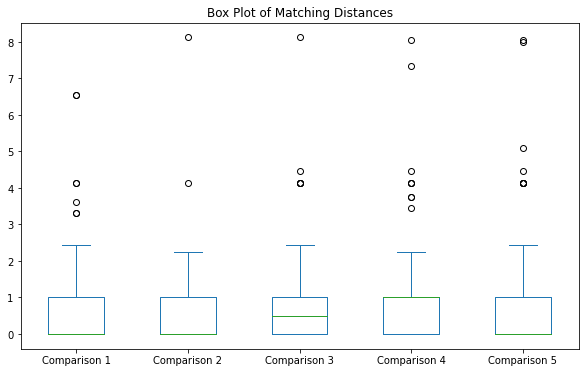

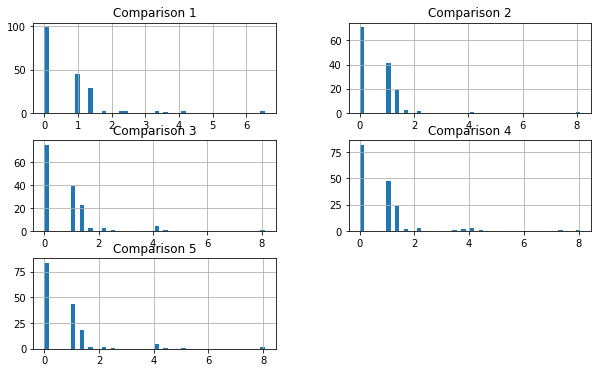

Tolerance based on 80th percentile: 1.4142135623730951
Tolerance based on 75th percentile: 1.0
Tolerance based on twice the standard deviation: 2.222196663773736
Skeleton 1 has 326 points.
Skeleton 2 has 2731 points.
Skeleton 1 has 326 points.
Skeleton 2 has 2731 points.
Skeleton 1 has 326 points.
Skeleton 2 has 2731 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1213 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1213 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1213 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1329 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1329 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1329 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1281 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1281 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1281 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1704 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1704 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1704 points.

Analysis Res

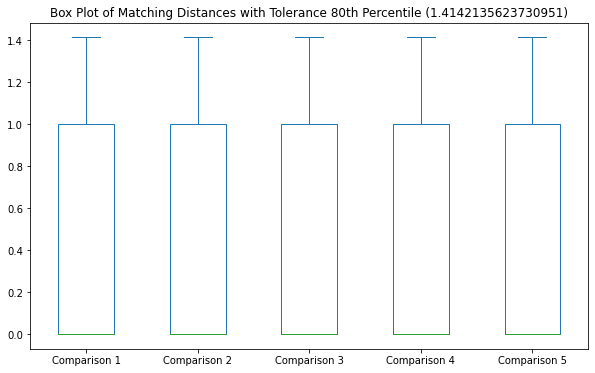

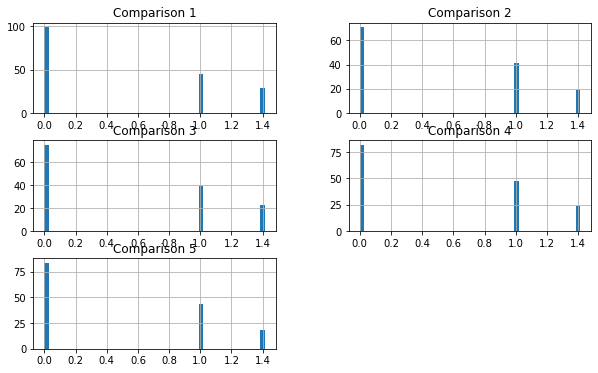

       Comparison 1  Comparison 2  Comparison 3  Comparison 4  Comparison 5
count    173.000000    131.000000    137.000000    154.000000    146.000000
mean       0.497180      0.518092      0.522094      0.532085      0.475725
std        0.591787      0.580696      0.591957      0.585223      0.569077
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%        1.000000      1.000000      1.000000      1.000000      1.000000
max        1.414214      1.414214      1.414214      1.414214      1.414214

Analysis Results with Tolerance 75th Percentile (1.0):
  Reference Skeleton Comparison Skeleton  Number of Matchings  \
0         Skeleton 1          Skeleton 2                  144   
1         Skeleton 1          Skeleton 2                  112   
2         Skeleton 1          Skeleton 2                  114   


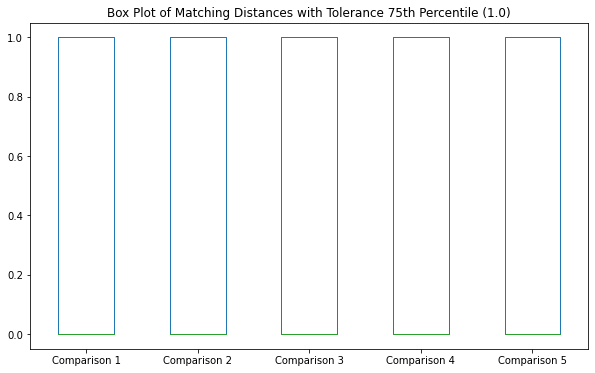

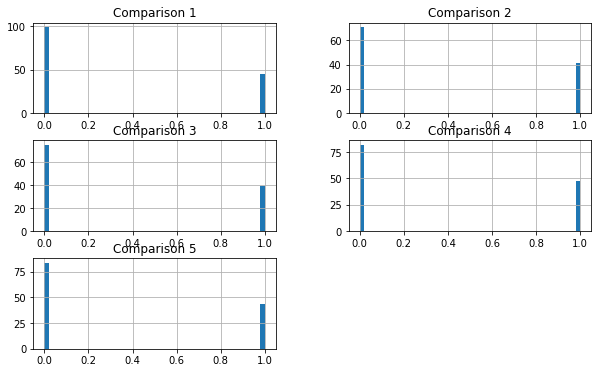

       Comparison 1  Comparison 2  Comparison 3  Comparison 4  Comparison 5
count     144.00000    112.000000    114.000000    130.000000    128.000000
mean        0.31250      0.366071      0.342105      0.369231      0.343750
std         0.46513      0.483894      0.476509      0.484463      0.476825
min         0.00000      0.000000      0.000000      0.000000      0.000000
25%         0.00000      0.000000      0.000000      0.000000      0.000000
50%         0.00000      0.000000      0.000000      0.000000      0.000000
75%         1.00000      1.000000      1.000000      1.000000      1.000000
max         1.00000      1.000000      1.000000      1.000000      1.000000

Analysis Results with Tolerance Twice Standard Deviation (2.222196663773736):
  Reference Skeleton Comparison Skeleton  Number of Matchings  \
0         Skeleton 1          Skeleton 2                  176   
1         Skeleton 1          Skeleton 2                  134   
2         Skeleton 1          Skeleton 2  

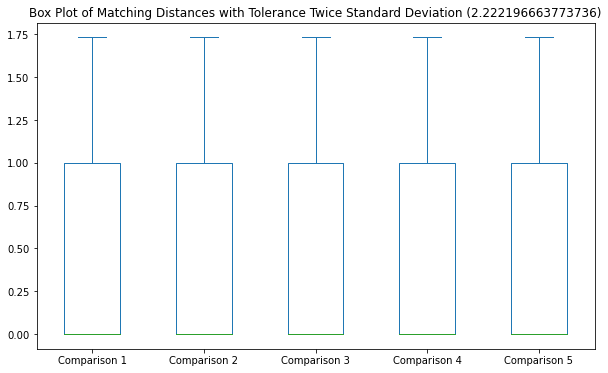

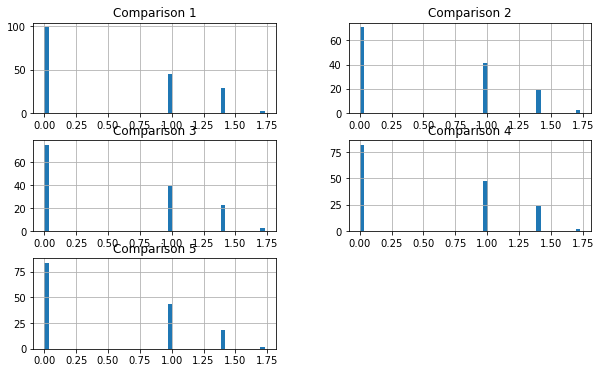

       Comparison 1  Comparison 2  Comparison 3  Comparison 4  Comparison 5
count    176.000000    134.000000    140.000000    156.000000    148.000000
mean       0.518229      0.545270      0.548022      0.547469      0.492702
std        0.608197      0.601747      0.611368      0.596999      0.583633
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%        1.000000      1.000000      1.000000      1.000000      1.000000
max        1.732051      1.732051      1.732051      1.732051      1.732051


In [17]:
# Main analysis function to gather results into DataFrames
def main():
    results = []
    matching_distances_list = []
    
    # Example paths for analysis; replace with your actual paths or loop through multiple files.
    analyses_paths = [
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/output_volume_smaller_skeleton_UNET_BOTTOM.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/baseline_gt_UNET_BOTTOM.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/skeleleton_clean_x20_th5_UNET_BOTTOM.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/dilated_volume_skeleton_UNET_BOTTOM.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/connected_blobs_UNET_BOTTOM.tif"),
    ]

    max_length = 0
    for path1, path2 in analyses_paths:
        result = analyze_skeletons(path1, path2)
        results.append(result)
        matching_distances_list.append(result['Matching Distances'])
        max_length = max(max_length, len(result['Matching Distances']))

    # Create a DataFrame from the results and display it as a table
    df_results = pd.DataFrame(results)
    
    # Create a separate DataFrame for matching distances
    padded_matching_distances = [distances + [np.nan] * (max_length - len(distances)) for distances in matching_distances_list]
    df_matching_distances = pd.DataFrame(padded_matching_distances).T

    # Rename columns based on comparisons
    df_matching_distances.columns = [f"Comparison {i+1}" for i in range(len(analyses_paths))]

    print("\nAnalysis Results:")
    print(df_results)
    
    print("\nMatching Distances:")
    print(df_matching_distances)
    
    summary_stats = df_matching_distances.describe()
    print(summary_stats)

    import matplotlib.pyplot as plt

    # Box plot
    df_matching_distances.plot(kind='box', figsize=(10, 6))
    plt.title('Box Plot of Matching Distances')
    plt.show()

    # Histogram
    df_matching_distances.hist(figsize=(10, 6), bins=50)
    plt.title('Histogram of Matching Distances')
    plt.show()

    # Determine the tolerances
    tolerance_80th = df_matching_distances.quantile(0.80).max()
    tolerance_75th = df_matching_distances.quantile(0.75).max()
    tolerance_2std = 2 * df_matching_distances.std().mean()

    print(f"Tolerance based on 80th percentile: {tolerance_80th}")
    print(f"Tolerance based on 75th percentile: {tolerance_75th}")
    print(f"Tolerance based on twice the standard deviation: {tolerance_2std}")

    # Perform matching analysis with tolerances
    results_with_tolerances = {
        f'Tolerance 80th Percentile ({tolerance_80th})': [],
        f'Tolerance 75th Percentile ({tolerance_75th})': [],
        f'Tolerance Twice Standard Deviation ({tolerance_2std})': [],
    }

    for path1, path2 in analyses_paths:
        results_with_tolerances[f'Tolerance 80th Percentile ({tolerance_80th})'].append(analyze_skeletons_with_tolerance(path1, path2, tolerance_80th))

        results_with_tolerances[f'Tolerance 75th Percentile ({tolerance_75th})'].append(analyze_skeletons_with_tolerance(path1, path2, tolerance_75th))

        results_with_tolerances[f'Tolerance Twice Standard Deviation ({tolerance_2std})'].append(analyze_skeletons_with_tolerance(path1, path2, tolerance_2std))

    # Create DataFrames for each tolerance
    dfs_with_tolerances = {}
    for tolerance_name, tolerance_results in results_with_tolerances.items():
        dfs_with_tolerances[tolerance_name] = pd.DataFrame(tolerance_results)

    # Print and visualize results for each tolerance
    for tolerance_name, df in dfs_with_tolerances.items():
        print(f"\nAnalysis Results with {tolerance_name}:")
        print(df)

        # Extract matching distances for each tolerance
        matching_distances_list = df['Matching Distances'].tolist()
        max_length = max(len(distances) for distances in matching_distances_list)
        padded_matching_distances = [distances + [np.nan] * (max_length - len(distances)) for distances in matching_distances_list]

        df_matching_distances_with_tolerance = pd.DataFrame(padded_matching_distances).T
        df_matching_distances_with_tolerance.columns = [f"Comparison {i+1}" for i in range(len(analyses_paths))]

        # Box plot
        df_matching_distances_with_tolerance.plot(kind='box', figsize=(10, 6))
        plt.title(f'Box Plot of Matching Distances with {tolerance_name}')
        plt.show()

        # Histogram
        df_matching_distances_with_tolerance.hist(figsize=(10, 6), bins=50)
        plt.title(f'Histogram of Matching Distances with {tolerance_name}')
        plt.show()

        # Summary statistics
        summary_stats = df_matching_distances_with_tolerance.describe()
        print(summary_stats)

# Example usage
if __name__ == "__main__":
    main()

## TOP 
--------------------------------------------------------------------------------------------------

### ckdTree > clDice (no tol)

In [8]:
import numpy as np
import tifffile
from scipy.spatial import cKDTree
import pandas as pd

def load_skeleton(skeleton_path):
    """Load the skeleton from a TIFF file."""
    skeleton = tifffile.imread(skeleton_path)
    skeleton = skeleton > 0  # Ensure it's binary
    return np.argwhere(skeleton)

def find_nearest_neighbors(points1, points2):
    """Find nearest neighbors from points1 to points2."""
    tree2 = cKDTree(points2)
    distances, indices = tree2.query(points1)
    return distances, indices

def calculate_dice(points1, points2):
    """Calculate the Dice coefficient between two sets of points."""
    # Find nearest neighbors
    distances12, indices12 = find_nearest_neighbors(points1, points2)
    distances21, indices21 = find_nearest_neighbors(points2, points1)

    # Count matchings
    matchings = sum(1 for i, idx in enumerate(indices12) if indices21[idx] == i)

    # Calculate Dice coefficient
    dice_coefficient = (2 * matchings) / (len(points1) + len(points2)) if (len(points1) + len(points2)) > 0 else 0
    return matchings, dice_coefficient

def analyze_skeletons(skeleton1_path, skeleton2_path):
    """Analyze two skeletons and compute matching metrics."""
    # Load skeletons
    points1 = load_skeleton(skeleton1_path)
    points2 = load_skeleton(skeleton2_path)

    # Check if points were loaded correctly
    print(f"Skeleton 1 has {len(points1)} points.")
    print(f"Skeleton 2 has {len(points2)} points.")

    # Determine which skeleton to use as reference
    reference_points = points1
    comparison_points = points2
    reference_name = "Skeleton 1"
    comparison_name = "Skeleton 2"
    """
    if len(points1) < len(points2):
        reference_points = points1
        comparison_points = points2
        reference_name = "Skeleton 1"
        comparison_name = "Skeleton 2"
    else:
        reference_points = points2
        comparison_points = points1
        reference_name = "Skeleton 2"
        comparison_name = "Skeleton 1"
    """

    # Find nearest neighbors
    distances_ref_to_comp, indices_ref_to_comp = find_nearest_neighbors(reference_points, comparison_points)
    distances_comp_to_ref, indices_comp_to_ref = find_nearest_neighbors(comparison_points, reference_points)

    # Count matchings
    matchings = sum(1 for i, idx in enumerate(indices_ref_to_comp) if indices_comp_to_ref[idx] == i)

    # Calculate average distance
    avg_distance_ref_to_comp = np.mean(distances_ref_to_comp) if len(distances_ref_to_comp) > 0 else float('nan')
    avg_distance_comp_to_ref = np.mean(distances_comp_to_ref) if len(distances_comp_to_ref) > 0 else float('nan')

    # Calculate percentage of matchings based on reference and comparison skeletons
    percentage_matchings_ref = (matchings / len(reference_points)) * 100 if len(reference_points) > 0 else 0
    percentage_matchings_comp = (matchings / len(comparison_points)) * 100 if len(comparison_points) > 0 else 0

    # Calculate Dice coefficient
    dice_coefficient = calculate_dice(points1, points2)[1]

    # Find matching indices
    matching_indices = [i for i, idx in enumerate(indices_ref_to_comp) if indices_comp_to_ref[idx] == i]

    # Calculate distances between matched points
    matching_distances = [np.linalg.norm(points1[i] - points2[indices_ref_to_comp[i]]) for i in matching_indices]

    # Average distance of matched points
    avg_matching_distance = np.mean(matching_distances) if matching_distances else float('nan')

    return {
        "Reference Skeleton": reference_name,
        "Comparison Skeleton": comparison_name,
        "Number of Matchings": matchings,
        "Percentage of Matchings (Ref)": percentage_matchings_ref,
        "Percentage of Matchings (Comp)": percentage_matchings_comp,
        "Average Distance (Ref to Comp)": avg_distance_ref_to_comp,
        "Average Distance (Comp to Ref)": avg_distance_comp_to_ref,
        "Dice Coefficient": dice_coefficient,
        "Average Matching Distance": avg_matching_distance,
    }

In [9]:
# Main analysis function to gather results into a DataFrame
def main():
    results = []
    
    # Example paths for analysis; replace with your actual paths or loop through multiple files.
    analyses_paths = [
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_TOP.tif","../tros_skeleton_nerea/final/FINAL/output_volume_smaller_skeleton_UNET_TOP.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_TOP.tif","../tros_skeleton_nerea/final/FINAL/baseline_gt_UNET_TOP.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_TOP.tif","../tros_skeleton_nerea/final/FINAL/skeleleton_clean_x20_th5_UNET_TOP.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_TOP.tif","../tros_skeleton_nerea/final/FINAL/dilated_volume_skeleton_TOP_UNET.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_TOP.tif","../tros_skeleton_nerea/final/FINAL/connected_blobs_UNET_TOP.tif"),
    ]

    for path1, path2 in analyses_paths:
        result = analyze_skeletons(path1, path2)
        results.append(result)

    # Create a DataFrame from the results and display it as a table
    df_results = pd.DataFrame(results)
    
    print("\nAnalysis Results:")
    print(df_results)

# Example usage
if __name__ == "__main__":
    main()

Skeleton 1 has 1902 points.
Skeleton 2 has 2224 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1309 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1728 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1774 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 2388 points.

Analysis Results:
  Reference Skeleton Comparison Skeleton  Number of Matchings  \
0         Skeleton 1          Skeleton 2                 1212   
1         Skeleton 1          Skeleton 2                  800   
2         Skeleton 1          Skeleton 2                 1119   
3         Skeleton 1          Skeleton 2                 1109   
4         Skeleton 1          Skeleton 2                 1162   

   Percentage of Matchings (Ref)  Percentage of Matchings (Comp)  \
0                      63.722397                       54.496403   
1                      42.060988                       61.115355   
2                      58.832808                       64.756944   
3                      58.307045      

### ckdTree > clDice (tol)

In [10]:
import numpy as np
import tifffile
from scipy.spatial import cKDTree
import pandas as pd
import matplotlib.pyplot as plt

def load_skeleton(skeleton_path):
    """Load the skeleton from a TIFF file."""
    skeleton = tifffile.imread(skeleton_path)
    skeleton = skeleton > 0  # Ensure it's binary
    return np.argwhere(skeleton)

def find_nearest_neighbors(points1, points2):
    """Find nearest neighbors from points1 to points2."""
    tree2 = cKDTree(points2)
    distances, indices = tree2.query(points1)
    return distances, indices

def calculate_dice(points1, points2):
    """Calculate the Dice coefficient between two sets of points."""
    # Find nearest neighbors
    distances12, indices12 = find_nearest_neighbors(points1, points2)
    distances21, indices21 = find_nearest_neighbors(points2, points1)

    # Count matchings
    matchings = sum(1 for i, idx in enumerate(indices12) if indices21[idx] == i)

    # Calculate Dice coefficient
    dice_coefficient = (2 * matchings) / (len(points1) + len(points2)) if (len(points1) + len(points2)) > 0 else 0
    return matchings, dice_coefficient

def analyze_skeletons(skeleton1_path, skeleton2_path):
    """Analyze two skeletons and compute matching metrics."""
    # Load skeletons
    points1 = load_skeleton(skeleton1_path)
    points2 = load_skeleton(skeleton2_path)

    # Check if points were loaded correctly
    print(f"Skeleton 1 has {len(points1)} points.")
    print(f"Skeleton 2 has {len(points2)} points.")

    # Determine which skeleton to use as reference
    reference_points = points1
    comparison_points = points2
    reference_name = "Skeleton 1"
    comparison_name = "Skeleton 2"
    """
    if len(points1) < len(points2):
        reference_points = points1
        comparison_points = points2
        reference_name = "Skeleton 1"
        comparison_name = "Skeleton 2"
    else:
        reference_points = points2
        comparison_points = points1
        reference_name = "Skeleton 2"
        comparison_name = "Skeleton 1"
    """

    # Find nearest neighbors
    distances_ref_to_comp, indices_ref_to_comp = find_nearest_neighbors(reference_points, comparison_points)
    distances_comp_to_ref, indices_comp_to_ref = find_nearest_neighbors(comparison_points, reference_points)

    # Count matchings
    matchings = sum(1 for i, idx in enumerate(indices_ref_to_comp) if indices_comp_to_ref[idx] == i)

    # Calculate average distance
    avg_distance_ref_to_comp = np.mean(distances_ref_to_comp) if len(distances_ref_to_comp) > 0 else float('nan')
    avg_distance_comp_to_ref = np.mean(distances_comp_to_ref) if len(distances_comp_to_ref) > 0 else float('nan')

    # Calculate percentage of matchings based on reference and comparison skeletons
    percentage_matchings_ref = (matchings / len(reference_points)) * 100 if len(reference_points) > 0 else 0
    percentage_matchings_comp = (matchings / len(comparison_points)) * 100 if len(comparison_points) > 0 else 0

    # Calculate Dice coefficient
    dice_coefficient = calculate_dice(points1, points2)[1]

    # Find matching indices
    matching_indices = [i for i, idx in enumerate(indices_ref_to_comp) if indices_comp_to_ref[idx] == i]

    # Calculate distances between matched points
    matching_distances = [np.linalg.norm(points1[i] - points2[indices_ref_to_comp[i]]) for i in matching_indices]

    # Average distance of matched points
    avg_matching_distance = np.mean(matching_distances) if matching_distances else float('nan')

    return {
        "Reference Skeleton": reference_name,
        "Comparison Skeleton": comparison_name,
        "Number of Matchings": matchings,
        "Percentage of Matchings (Ref)": percentage_matchings_ref,
        "Percentage of Matchings (Comp)": percentage_matchings_comp,
        "Average Distance (Ref to Comp)": avg_distance_ref_to_comp,
        "Average Distance (Comp to Ref)": avg_distance_comp_to_ref,
        "Dice Coefficient": dice_coefficient,
        "Average Matching Distance": avg_matching_distance,
        "Matching Distances": matching_distances,
    }

def analyze_skeletons_with_tolerance(skeleton1_path, skeleton2_path, tolerance):
    """Analyze two skeletons and compute matching metrics with a specified tolerance."""
    # Load skeletons
    points1 = load_skeleton(skeleton1_path)
    points2 = load_skeleton(skeleton2_path)

    # Check if points were loaded correctly
    print(f"Skeleton 1 has {len(points1)} points.")
    print(f"Skeleton 2 has {len(points2)} points.")

    # Determine which skeleton to use as reference
    if len(points1) < len(points2):
        reference_points = points1
        comparison_points = points2
        reference_name = "Skeleton 1"
        comparison_name = "Skeleton 2"
    else:
        reference_points = points2
        comparison_points = points1
        reference_name = "Skeleton 2"
        comparison_name = "Skeleton 1"

    # Find nearest neighbors in both directions
    distances_ref_to_comp, indices_ref_to_comp = find_nearest_neighbors(reference_points, comparison_points)
    distances_comp_to_ref, indices_comp_to_ref = find_nearest_neighbors(comparison_points, reference_points)

    # Identify valid matchings based on mutual nearest neighbors
    matchings = []
    for i in range(len(reference_points)):
        if distances_ref_to_comp[i] <= tolerance:
            corresponding_index = indices_ref_to_comp[i]
            # Check if it's mutual (the closest point from comparison back to reference)
            if indices_comp_to_ref[corresponding_index] == i and distances_comp_to_ref[corresponding_index] <= tolerance:
                matchings.append((i, corresponding_index))  # Store matching indices

    # Count matchings
    num_matchings = len(matchings)

    # Calculate average distance for matched points only
    matching_distances = [np.linalg.norm(reference_points[i] - comparison_points[j]) for i, j in matchings]

    # Average distance of matched points
    avg_matching_distance = np.mean(matching_distances) if matching_distances else float('nan')

    # Calculate average distances for all points (ref to comp and comp to ref)
    avg_distance_ref_to_comp = np.mean(distances_ref_to_comp) if len(distances_ref_to_comp) > 0 else float('nan')
    avg_distance_comp_to_ref = np.mean(distances_comp_to_ref) if len(distances_comp_to_ref) > 0 else float('nan')

    # Calculate Dice coefficient using all points and matching based on tolerance
    total_points_reference = len(reference_points)
    total_points_comparison = len(comparison_points)

    dice_coefficient = (2 * num_matchings) / (total_points_reference + total_points_comparison) if (total_points_reference + total_points_comparison) > 0 else 0

    # Calculate percentage of matchings based on reference and comparison skeletons
    percentage_matchings_ref = (num_matchings / total_points_reference) * 100 if total_points_reference > 0 else 0
    percentage_matchings_comp = (num_matchings / total_points_comparison) * 100 if total_points_comparison > 0 else 0

    return {
        "Reference Skeleton": reference_name,
        "Comparison Skeleton": comparison_name,
        "Number of Matchings": num_matchings,
        "Percentage of Matchings (Ref)": percentage_matchings_ref,
        "Percentage of Matchings (Comp)": percentage_matchings_comp,
        "Average Distance (Ref to Comp)": avg_distance_ref_to_comp,
        "Average Distance (Comp to Ref)": avg_distance_comp_to_ref,
        "Dice Coefficient": dice_coefficient,
        "Average Matching Distance": avg_matching_distance,
        "Matching Distances": matching_distances,
    }



Skeleton 1 has 1902 points.
Skeleton 2 has 2224 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1309 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1728 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1774 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 2388 points.

Analysis Results:
  Reference Skeleton Comparison Skeleton  Number of Matchings  \
0         Skeleton 1          Skeleton 2                 1212   
1         Skeleton 1          Skeleton 2                  800   
2         Skeleton 1          Skeleton 2                 1119   
3         Skeleton 1          Skeleton 2                 1109   
4         Skeleton 1          Skeleton 2                 1162   

   Percentage of Matchings (Ref)  Percentage of Matchings (Comp)  \
0                      63.722397                       54.496403   
1                      42.060988                       61.115355   
2                      58.832808                       64.756944   
3                      58.307045      

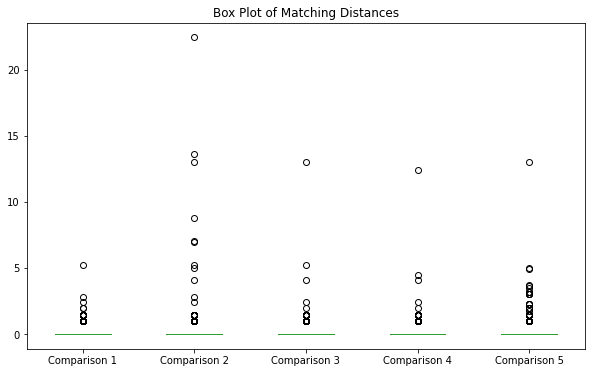

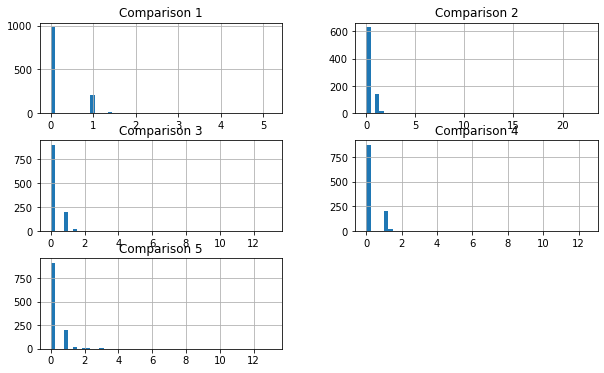

Tolerance based on 80th percentile: 1.0
Tolerance based on 75th percentile: 0.0
Tolerance based on twice the standard deviation: 1.4133570453937652
Skeleton 1 has 1902 points.
Skeleton 2 has 2224 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 2224 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 2224 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1309 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1309 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1309 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1728 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1728 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1728 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1774 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1774 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1774 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 2388 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 2388 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 2388 points.

Analysis Re

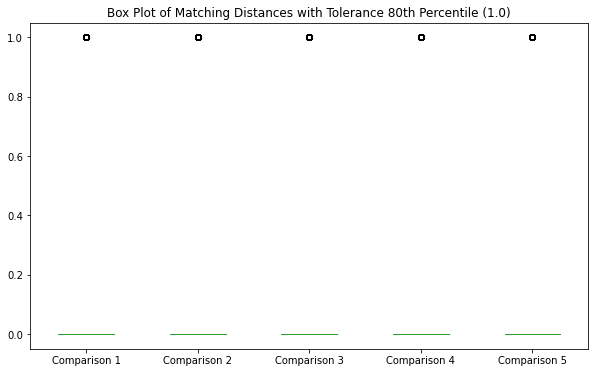

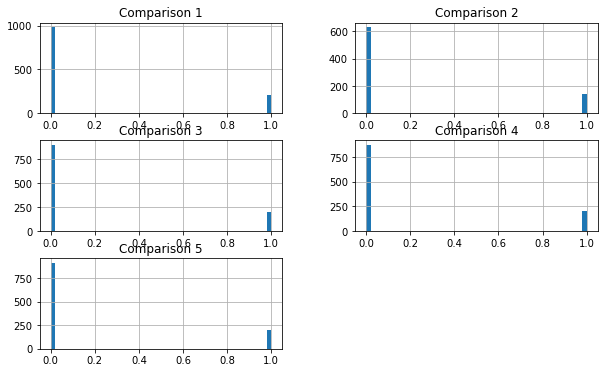

       Comparison 1  Comparison 2  Comparison 3  Comparison 4  Comparison 5
count   1193.000000    776.000000   1098.000000   1083.000000   1123.000000
mean       0.175189      0.184278      0.181239      0.191136      0.182547
std        0.380288      0.387961      0.385391      0.393377      0.386467
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000      0.000000      0.000000
max        1.000000      1.000000      1.000000      1.000000      1.000000

Analysis Results with Tolerance 75th Percentile (0.0):
  Reference Skeleton Comparison Skeleton  Number of Matchings  \
0         Skeleton 1          Skeleton 2                  984   
1         Skeleton 2          Skeleton 1                  633   
2         Skeleton 2          Skeleton 1                  899   


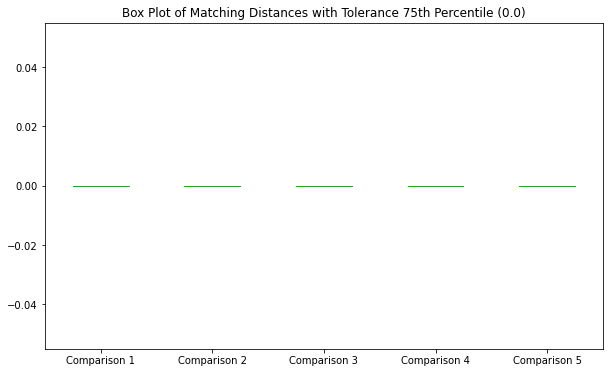

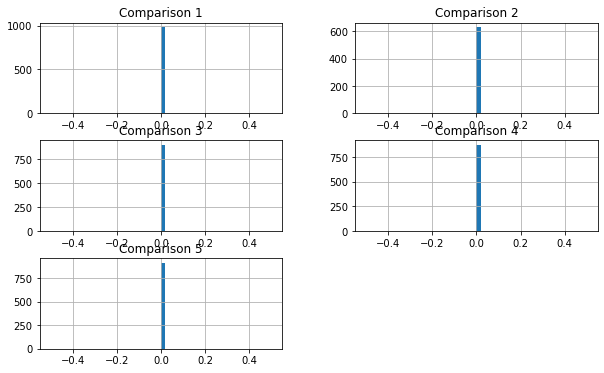

       Comparison 1  Comparison 2  Comparison 3  Comparison 4  Comparison 5
count         984.0         633.0         899.0         876.0         918.0
mean            0.0           0.0           0.0           0.0           0.0
std             0.0           0.0           0.0           0.0           0.0
min             0.0           0.0           0.0           0.0           0.0
25%             0.0           0.0           0.0           0.0           0.0
50%             0.0           0.0           0.0           0.0           0.0
75%             0.0           0.0           0.0           0.0           0.0
max             0.0           0.0           0.0           0.0           0.0

Analysis Results with Tolerance Twice Standard Deviation (1.4133570453937652):
  Reference Skeleton Comparison Skeleton  Number of Matchings  \
0         Skeleton 1          Skeleton 2                 1193   
1         Skeleton 2          Skeleton 1                  776   
2         Skeleton 2          Skeleton 1 

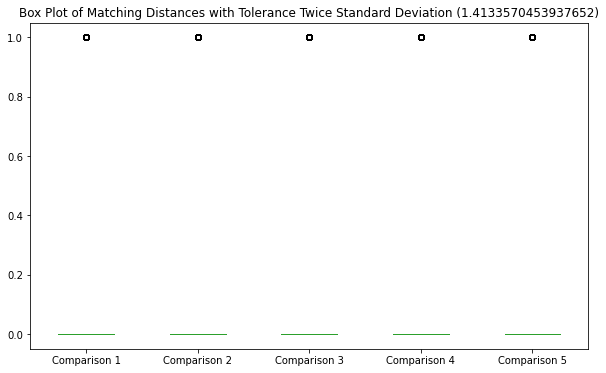

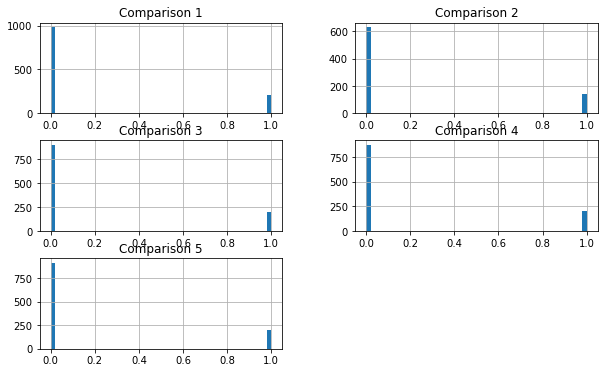

       Comparison 1  Comparison 2  Comparison 3  Comparison 4  Comparison 5
count   1193.000000    776.000000   1098.000000   1083.000000   1123.000000
mean       0.175189      0.184278      0.181239      0.191136      0.182547
std        0.380288      0.387961      0.385391      0.393377      0.386467
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000      0.000000      0.000000
max        1.000000      1.000000      1.000000      1.000000      1.000000


In [11]:
# Main analysis function to gather results into DataFrames
def main():
    results = []
    matching_distances_list = []
    
    # Example paths for analysis; replace with your actual paths or loop through multiple files.
    analyses_paths = [
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_TOP.tif","../tros_skeleton_nerea/final/FINAL/output_volume_smaller_skeleton_UNET_TOP.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_TOP.tif","../tros_skeleton_nerea/final/FINAL/baseline_gt_UNET_TOP.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_TOP.tif","../tros_skeleton_nerea/final/FINAL/skeleleton_clean_x20_th5_UNET_TOP.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_TOP.tif","../tros_skeleton_nerea/final/FINAL/dilated_volume_skeleton_TOP_UNET.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_TOP.tif","../tros_skeleton_nerea/final/FINAL/connected_blobs_UNET_TOP.tif"),
    ]

    max_length = 0
    for path1, path2 in analyses_paths:
        result = analyze_skeletons(path1, path2)
        results.append(result)
        matching_distances_list.append(result['Matching Distances'])
        max_length = max(max_length, len(result['Matching Distances']))

    # Create a DataFrame from the results and display it as a table
    df_results = pd.DataFrame(results)
    
    # Create a separate DataFrame for matching distances
    padded_matching_distances = [distances + [np.nan] * (max_length - len(distances)) for distances in matching_distances_list]
    df_matching_distances = pd.DataFrame(padded_matching_distances).T

    # Rename columns based on comparisons
    df_matching_distances.columns = [f"Comparison {i+1}" for i in range(len(analyses_paths))]

    print("\nAnalysis Results:")
    print(df_results)
    
    print("\nMatching Distances:")
    print(df_matching_distances)
    
    summary_stats = df_matching_distances.describe()
    print(summary_stats)

    import matplotlib.pyplot as plt

    # Box plot
    df_matching_distances.plot(kind='box', figsize=(10, 6))
    plt.title('Box Plot of Matching Distances')
    plt.show()

    # Histogram
    df_matching_distances.hist(figsize=(10, 6), bins=50)
    plt.title('Histogram of Matching Distances')
    plt.show()

    # Determine the tolerances
    tolerance_80th = df_matching_distances.quantile(0.80).max()
    tolerance_75th = df_matching_distances.quantile(0.75).max()
    tolerance_2std = 2 * df_matching_distances.std().mean()

    print(f"Tolerance based on 80th percentile: {tolerance_80th}")
    print(f"Tolerance based on 75th percentile: {tolerance_75th}")
    print(f"Tolerance based on twice the standard deviation: {tolerance_2std}")

    # Perform matching analysis with tolerances
    results_with_tolerances = {
        f'Tolerance 80th Percentile ({tolerance_80th})': [],
        f'Tolerance 75th Percentile ({tolerance_75th})': [],
        f'Tolerance Twice Standard Deviation ({tolerance_2std})': [],
    }

    for path1, path2 in analyses_paths:
        results_with_tolerances[f'Tolerance 80th Percentile ({tolerance_80th})'].append(analyze_skeletons_with_tolerance(path1, path2, tolerance_80th))

        results_with_tolerances[f'Tolerance 75th Percentile ({tolerance_75th})'].append(analyze_skeletons_with_tolerance(path1, path2, tolerance_75th))

        results_with_tolerances[f'Tolerance Twice Standard Deviation ({tolerance_2std})'].append(analyze_skeletons_with_tolerance(path1, path2, tolerance_2std))

    # Create DataFrames for each tolerance
    dfs_with_tolerances = {}
    for tolerance_name, tolerance_results in results_with_tolerances.items():
        dfs_with_tolerances[tolerance_name] = pd.DataFrame(tolerance_results)

    # Print and visualize results for each tolerance
    for tolerance_name, df in dfs_with_tolerances.items():
        print(f"\nAnalysis Results with {tolerance_name}:")
        print(df)

        # Extract matching distances for each tolerance
        matching_distances_list = df['Matching Distances'].tolist()
        max_length = max(len(distances) for distances in matching_distances_list)
        padded_matching_distances = [distances + [np.nan] * (max_length - len(distances)) for distances in matching_distances_list]

        df_matching_distances_with_tolerance = pd.DataFrame(padded_matching_distances).T
        df_matching_distances_with_tolerance.columns = [f"Comparison {i+1}" for i in range(len(analyses_paths))]

        # Box plot
        df_matching_distances_with_tolerance.plot(kind='box', figsize=(10, 6))
        plt.title(f'Box Plot of Matching Distances with {tolerance_name}')
        plt.show()

        # Histogram
        df_matching_distances_with_tolerance.hist(figsize=(10, 6), bins=50)
        plt.title(f'Histogram of Matching Distances with {tolerance_name}')
        plt.show()

        # Summary statistics
        summary_stats = df_matching_distances_with_tolerance.describe()
        print(summary_stats)

# Example usage
if __name__ == "__main__":
    main()

---------------------------------------------------------------

## NETWORK ANALYSIS BOTTOM 

In [12]:
import numpy as np
import tifffile
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

def get_neighbors(point, shape):
    """Get neighboring points in a 3D grid."""
    neighbors = []
    for x in range(max(0, point[0]-1), min(point[0]+2, shape[0])):
        for y in range(max(0, point[1]-1), min(point[1]+2, shape[1])):
            for z in range(max(0, point[2]-1), min(point[2]+2, shape[2])):
                if (x, y, z) != point:
                    neighbors.append((x, y, z))
    return neighbors

def analyze_skeleton(skeleton_path):
    """Analyze the skeleton from a given TIFF file and display statistics and histograms."""
    # Load the skeleton
    skeleton = tifffile.imread(skeleton_path)
    skeleton = skeleton > 0  # Ensure it's binary

    # Create a graph from the skeleton
    G = nx.Graph()

    # Add nodes
    for point in np.argwhere(skeleton):
        G.add_node(tuple(point))

    # Add edges
    for node in G.nodes():
        for neighbor in get_neighbors(node, skeleton.shape):
            if skeleton[neighbor]:
                G.add_edge(node, neighbor)

    # Calculate degrees and average degree
    degrees = [d for n, d in G.degree()]
    average_degree = sum(degrees) / len(G) if degrees else 0

    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Average degree: {average_degree:.2f}")

    # Identify branch points and endpoints
    branch_points = [node for node, degree in G.degree() if degree > 2]
    endpoints = [node for node, degree in G.degree() if degree == 1]

    print(f"Number of branch points: {len(branch_points)}")
    print(f"Number of endpoints: {len(endpoints)}")

    # Count the number of nodes for each degree
    degree_counts = Counter(degrees)
    
    print("\nNumber of nodes of each degree:")
    for degree in sorted(degree_counts.keys()):
        print(f"Degree {degree}: {degree_counts[degree]} nodes")

    # Create a histogram of node degrees (all nodes)
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 2, 1)  # First subplot for all nodes
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2, 1), align='left', rwidth=0.8)
    plt.xlabel('Node Degree')
    plt.ylabel('Frequency')
    plt.title('Histogram of Node Degrees (All Nodes)')
    
    if degrees:  # Check if there are degrees to plot
        plt.axvline(x=average_degree, color='r', linestyle='--', label=f'Average Degree: {average_degree:.2f}')
        plt.legend()
    
    plt.grid(axis='y', alpha=0.75)

    # Calculate degrees and average degree without considering nodes with degree 2
    filtered_degrees = [d for d in degrees if d != 2]
    average_degree_filtered = sum(filtered_degrees) / len(filtered_degrees) if filtered_degrees else 0

    print(f"Average degree (excluding nodes with degree 2): {average_degree_filtered:.2f}")

    # Create a histogram of node degrees (excluding degree 2 nodes)
    plt.subplot(1, 2, 2)  # Second subplot for filtered graph
    plt.hist(filtered_degrees, bins=range(min(filtered_degrees), max(filtered_degrees) + 2, 1), align='left', rwidth=0.8)
    plt.xlabel('Node Degree')
    plt.ylabel('Frequency')
    plt.title('Histogram of Node Degrees (Excluding Degree 2 Nodes)')
    
    if filtered_degrees:  # Check if there are degrees to plot
        plt.axvline(x=average_degree_filtered, color='r', linestyle='--', label=f'Average Degree: {average_degree_filtered:.2f}')
        plt.legend()

    plt.grid(axis='y', alpha=0.75)
    
    plt.tight_layout()
    plt.show()

Number of nodes: 770
Number of edges: 798
Average degree: 2.07
Number of branch points: 120
Number of endpoints: 67

Number of nodes of each degree:
Degree 1: 67 nodes
Degree 2: 583 nodes
Degree 3: 117 nodes
Degree 4: 3 nodes
Average degree (excluding nodes with degree 2): 2.30


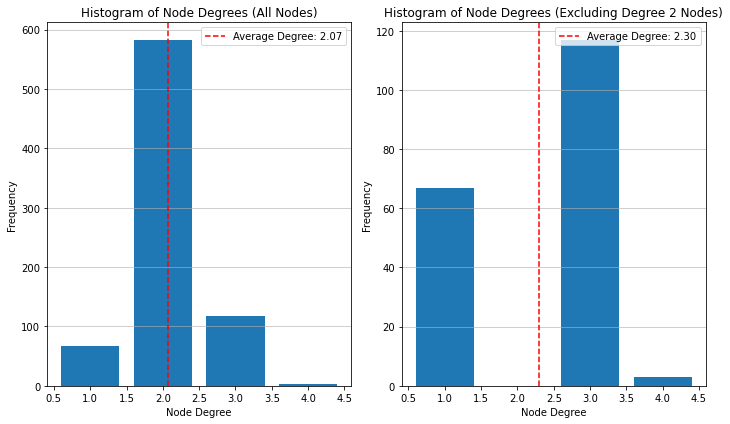

In [13]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/output_volume_smaller_skeleton_BOTTOM.tif")

Number of nodes: 193
Number of edges: 172
Average degree: 1.78
Number of branch points: 23
Number of endpoints: 55

Number of nodes of each degree:
Degree 0: 5 nodes
Degree 1: 55 nodes
Degree 2: 110 nodes
Degree 3: 23 nodes
Average degree (excluding nodes with degree 2): 1.49


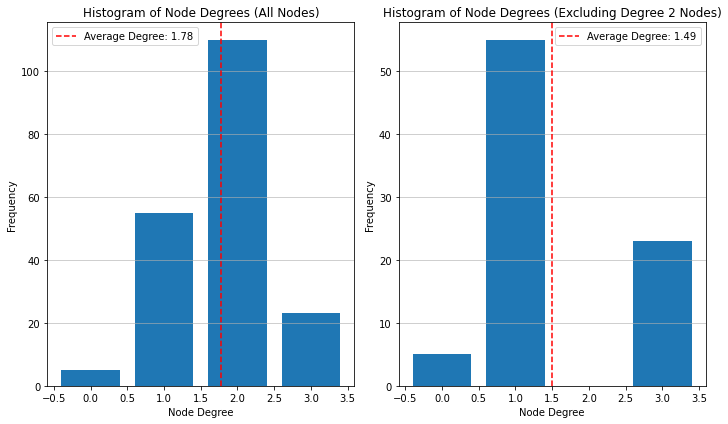

In [14]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/baseline_gt_BOTTOM.tif")

Number of nodes: 278
Number of edges: 255
Average degree: 1.83
Number of branch points: 33
Number of endpoints: 57

Number of nodes of each degree:
Degree 0: 11 nodes
Degree 1: 57 nodes
Degree 2: 177 nodes
Degree 3: 33 nodes
Average degree (excluding nodes with degree 2): 1.54


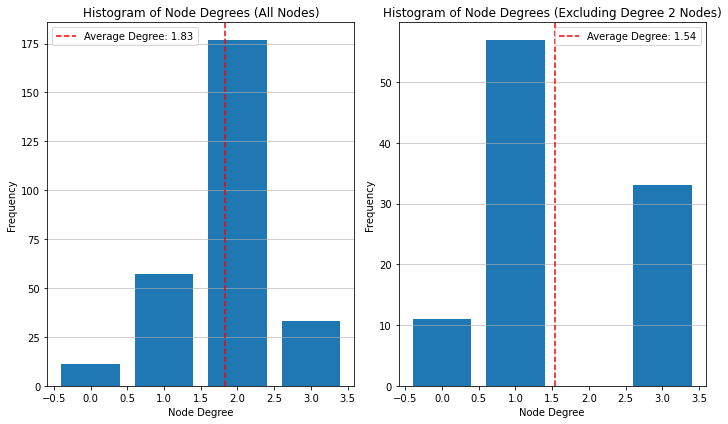

In [15]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/skeleleton_clean_x20_th5_BOTTOM.tif")

Number of nodes: 310
Number of edges: 317
Average degree: 2.05
Number of branch points: 41
Number of endpoints: 28

Number of nodes of each degree:
Degree 1: 28 nodes
Degree 2: 241 nodes
Degree 3: 40 nodes
Degree 4: 1 nodes
Average degree (excluding nodes with degree 2): 2.20


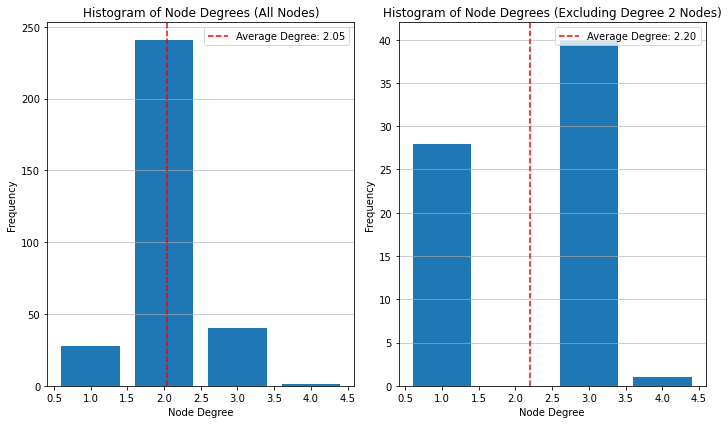

In [16]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/dilated_volume_skeleton_BOTTOM.tif")

Number of nodes: 326
Number of edges: 336
Average degree: 2.06
Number of branch points: 45
Number of endpoints: 26

Number of nodes of each degree:
Degree 1: 26 nodes
Degree 2: 255 nodes
Degree 3: 44 nodes
Degree 4: 1 nodes
Average degree (excluding nodes with degree 2): 2.28


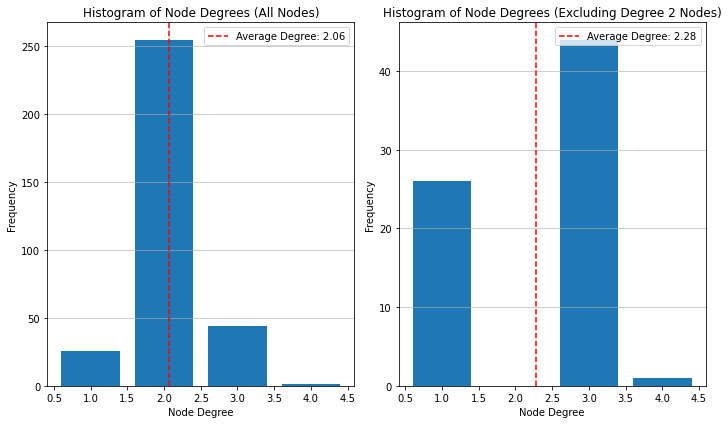

In [17]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif")

In [18]:
############################################################################

Number of nodes: 2731
Number of edges: 4073
Average degree: 2.98
Number of branch points: 757
Number of endpoints: 196

Number of nodes of each degree:
Degree 0: 11 nodes
Degree 1: 196 nodes
Degree 2: 1767 nodes
Degree 3: 289 nodes
Degree 4: 27 nodes
Degree 5: 5 nodes
Degree 6: 28 nodes
Degree 7: 129 nodes
Degree 8: 215 nodes
Degree 9: 34 nodes
Degree 10: 14 nodes
Degree 11: 13 nodes
Degree 12: 3 nodes
Average degree (excluding nodes with degree 2): 4.78


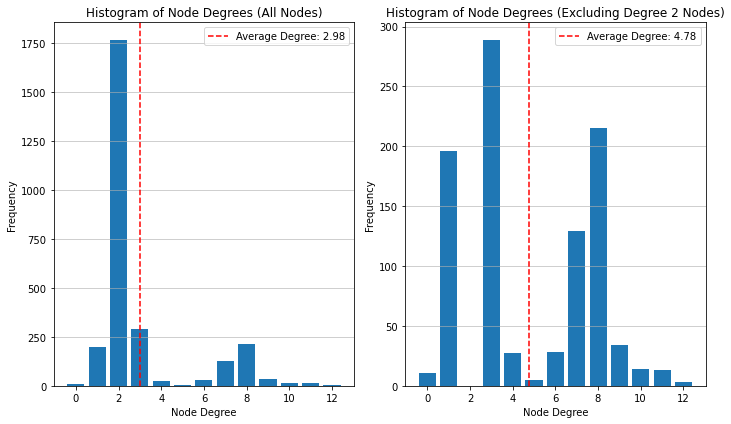

In [19]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/output_volume_smaller_skeleton_UNET_BOTTOM.tif")

Number of nodes: 1213
Number of edges: 1217
Average degree: 2.01
Number of branch points: 167
Number of endpoints: 194

Number of nodes of each degree:
Degree 0: 22 nodes
Degree 1: 194 nodes
Degree 2: 830 nodes
Degree 3: 120 nodes
Degree 4: 27 nodes
Degree 5: 12 nodes
Degree 6: 4 nodes
Degree 7: 4 nodes
Average degree (excluding nodes with degree 2): 2.02


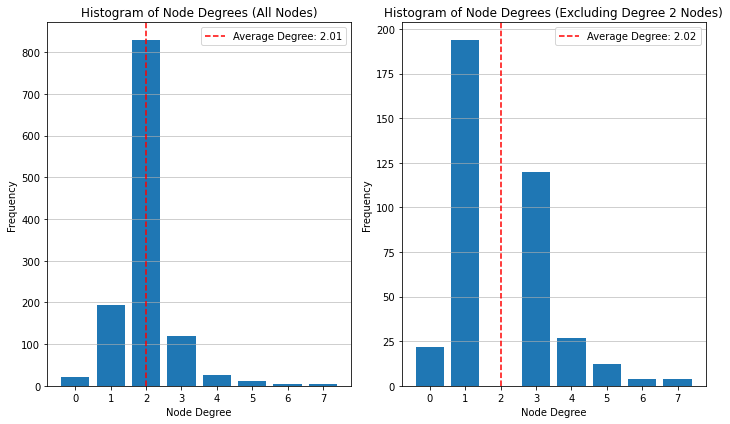

In [20]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/baseline_gt_UNET_BOTTOM.tif")

Number of nodes: 1329
Number of edges: 1469
Average degree: 2.21
Number of branch points: 241
Number of endpoints: 198

Number of nodes of each degree:
Degree 0: 27 nodes
Degree 1: 198 nodes
Degree 2: 863 nodes
Degree 3: 137 nodes
Degree 4: 30 nodes
Degree 5: 27 nodes
Degree 6: 13 nodes
Degree 7: 16 nodes
Degree 8: 10 nodes
Degree 9: 3 nodes
Degree 10: 4 nodes
Degree 11: 1 nodes
Average degree (excluding nodes with degree 2): 2.60


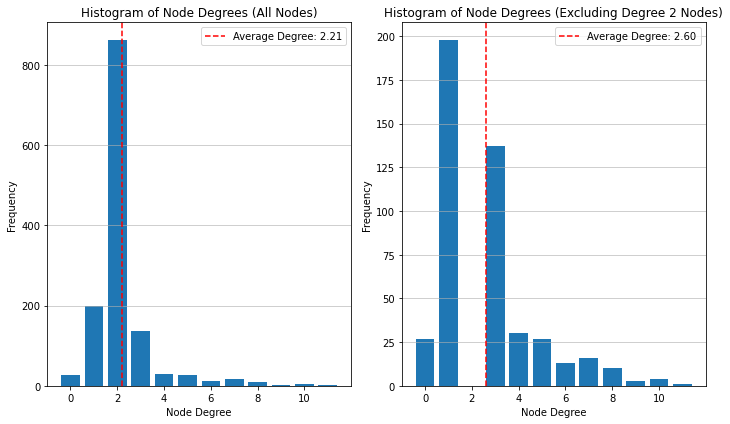

In [21]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/skeleleton_clean_x20_th5_UNET_BOTTOM.tif")

Number of nodes: 1704
Number of edges: 1999
Average degree: 2.35
Number of branch points: 371
Number of endpoints: 110

Number of nodes of each degree:
Degree 0: 1 nodes
Degree 1: 110 nodes
Degree 2: 1222 nodes
Degree 3: 239 nodes
Degree 4: 54 nodes
Degree 5: 28 nodes
Degree 6: 14 nodes
Degree 7: 16 nodes
Degree 8: 11 nodes
Degree 9: 4 nodes
Degree 10: 4 nodes
Degree 11: 1 nodes
Average degree (excluding nodes with degree 2): 3.22


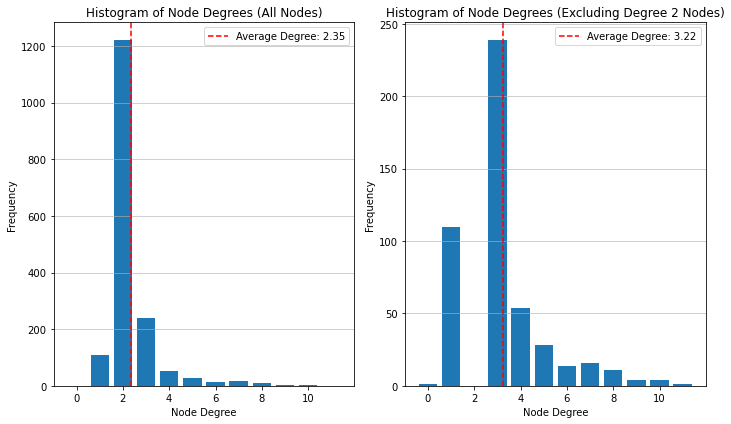

In [22]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/connected_blobs_UNET_BOTTOM.tif")

Number of nodes: 1281
Number of edges: 1317
Average degree: 2.06
Number of branch points: 180
Number of endpoints: 113

Number of nodes of each degree:
Degree 1: 113 nodes
Degree 2: 988 nodes
Degree 3: 175 nodes
Degree 4: 5 nodes
Average degree (excluding nodes with degree 2): 2.25


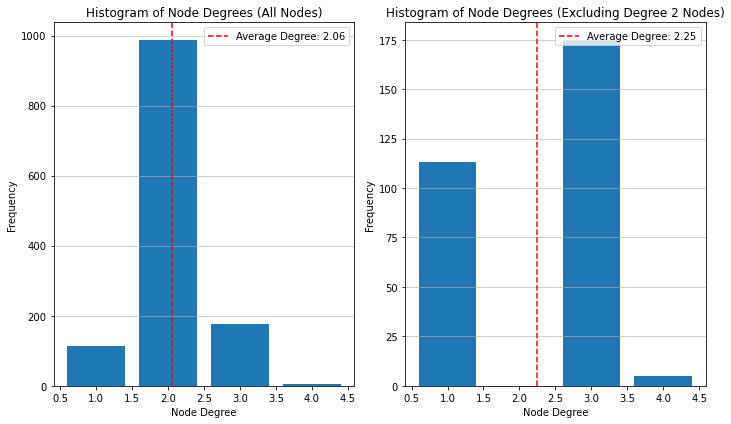

In [23]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/dilated_volume_skeleton_UNET_BOTTOM.tif")

In [24]:
    # Example paths for analysis; replace with your actual paths or loop through multiple files.
    analyses_paths = [
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/output_volume_smaller_skeleton_UNET_BOTTOM.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/baseline_gt_UNET_BOTTOM.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/skeleleton_clean_x20_th5_UNET_BOTTOM.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/dilated_volume_skeleton_UNET_BOTTOM.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/connected_blobs_UNET_BOTTOM.tif"),
    ]


### NETWORK ANALYSIS TOP

Number of nodes: 2113
Number of edges: 2127
Average degree: 2.01
Number of branch points: 106
Number of endpoints: 88

Number of nodes of each degree:
Degree 0: 1 nodes
Degree 1: 88 nodes
Degree 2: 1918 nodes
Degree 3: 95 nodes
Degree 4: 10 nodes
Degree 5: 1 nodes
Average degree (excluding nodes with degree 2): 2.14


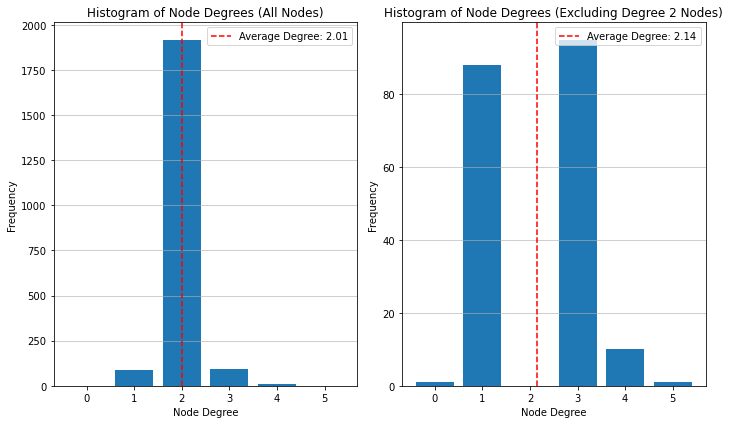

In [25]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/output_volume_smaller_skeleton_TOP.tif")

Number of nodes: 1055
Number of edges: 1023
Average degree: 1.94
Number of branch points: 16
Number of endpoints: 78

Number of nodes of each degree:
Degree 0: 1 nodes
Degree 1: 78 nodes
Degree 2: 960 nodes
Degree 3: 16 nodes
Average degree (excluding nodes with degree 2): 1.33


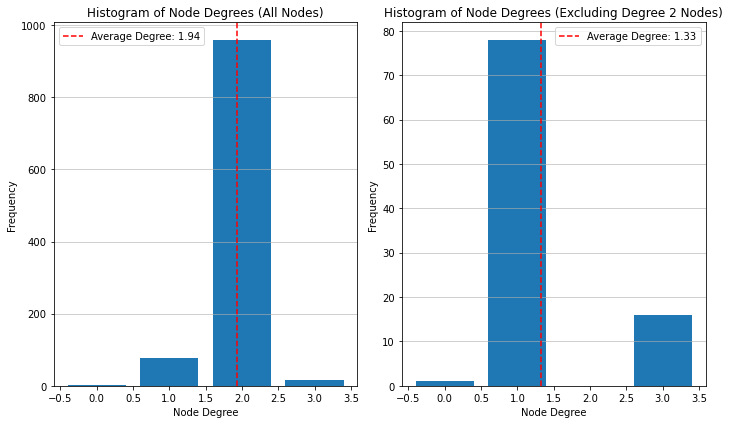

In [26]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/baseline_gt_TOP.tif")

Number of nodes: 1517
Number of edges: 1501
Average degree: 1.98
Number of branch points: 46
Number of endpoints: 81

Number of nodes of each degree:
Degree 0: 1 nodes
Degree 1: 81 nodes
Degree 2: 1389 nodes
Degree 3: 41 nodes
Degree 4: 5 nodes
Average degree (excluding nodes with degree 2): 1.75


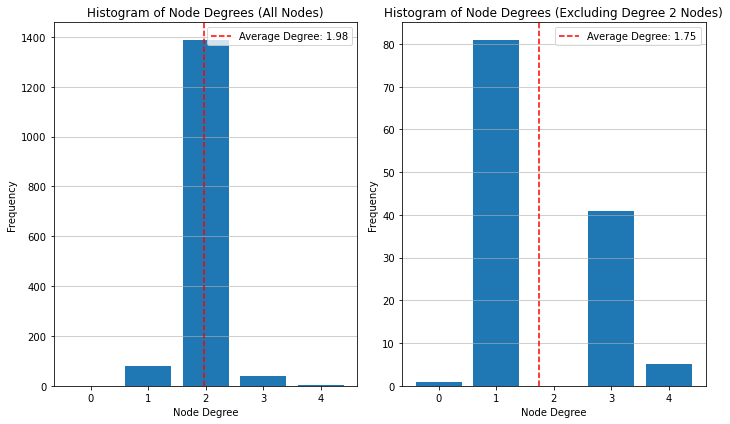

In [27]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/skeleleton_clean_x20_th5_TOP.tif")

Number of nodes: 1529
Number of edges: 1522
Average degree: 1.99
Number of branch points: 36
Number of endpoints: 55

Number of nodes of each degree:
Degree 1: 55 nodes
Degree 2: 1438 nodes
Degree 3: 31 nodes
Degree 4: 5 nodes
Average degree (excluding nodes with degree 2): 1.85


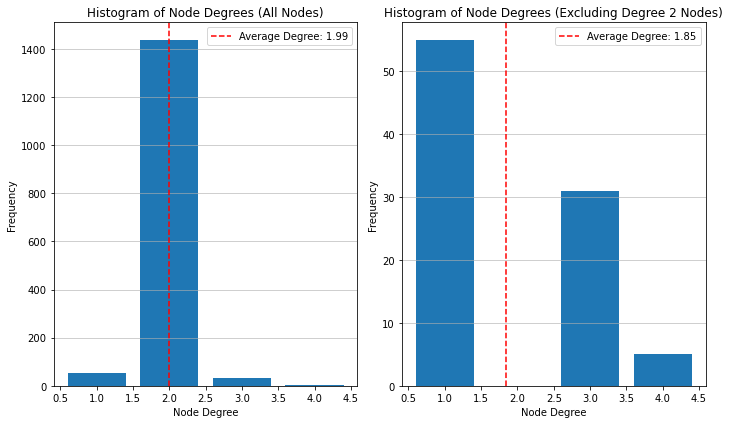

In [28]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/dilated_volume_skeleton_TOP.tif")

Number of nodes: 1902
Number of edges: 1928
Average degree: 2.03
Number of branch points: 93
Number of endpoints: 48

Number of nodes of each degree:
Degree 1: 48 nodes
Degree 2: 1761 nodes
Degree 3: 86 nodes
Degree 4: 7 nodes
Average degree (excluding nodes with degree 2): 2.37


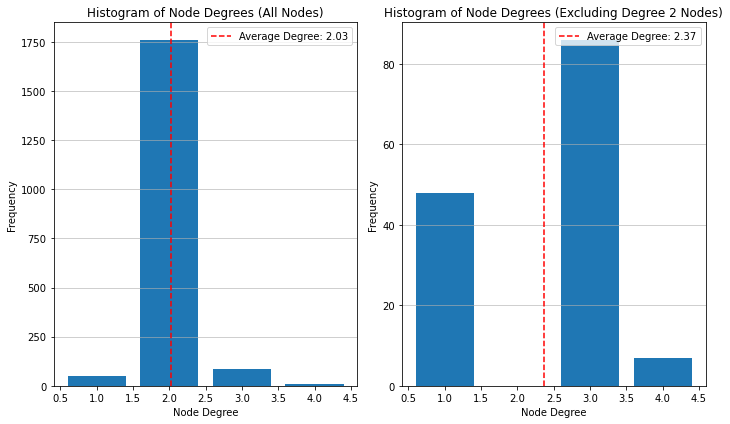

In [29]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/connected_blobs_TOP.tif")

In [30]:
############################ UNET ##############################

Number of nodes: 2224
Number of edges: 2220
Average degree: 2.00
Number of branch points: 132
Number of endpoints: 185

Number of nodes of each degree:
Degree 0: 23 nodes
Degree 1: 185 nodes
Degree 2: 1884 nodes
Degree 3: 103 nodes
Degree 4: 6 nodes
Degree 5: 5 nodes
Degree 6: 5 nodes
Degree 7: 9 nodes
Degree 8: 1 nodes
Degree 9: 2 nodes
Degree 10: 1 nodes
Average degree (excluding nodes with degree 2): 1.98


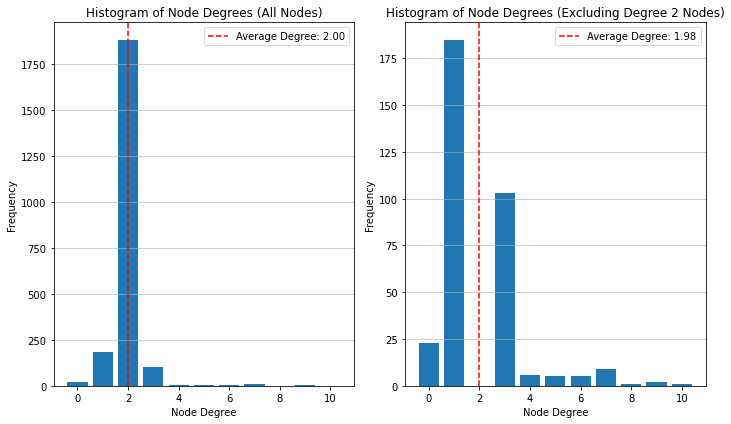

In [31]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/output_volume_smaller_skeleton_UNET_TOP.tif")

Number of nodes: 1309
Number of edges: 1209
Average degree: 1.85
Number of branch points: 30
Number of endpoints: 179

Number of nodes of each degree:
Degree 0: 26 nodes
Degree 1: 179 nodes
Degree 2: 1074 nodes
Degree 3: 29 nodes
Degree 4: 1 nodes
Average degree (excluding nodes with degree 2): 1.15


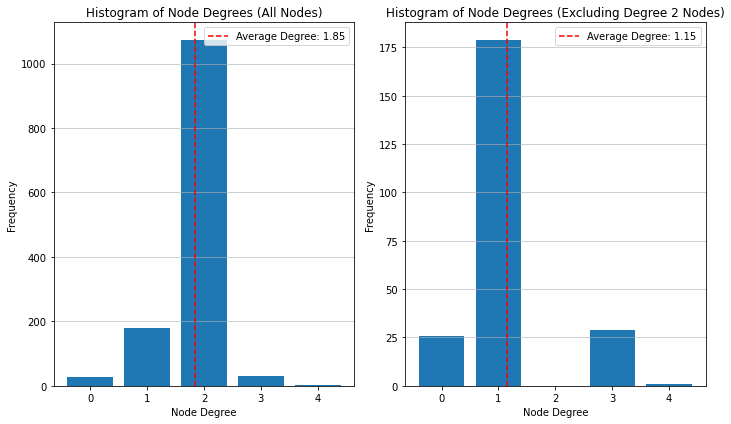

In [32]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/baseline_gt_UNET_TOP.tif")

Number of nodes: 1728
Number of edges: 1662
Average degree: 1.92
Number of branch points: 63
Number of endpoints: 180

Number of nodes of each degree:
Degree 0: 24 nodes
Degree 1: 180 nodes
Degree 2: 1461 nodes
Degree 3: 50 nodes
Degree 4: 4 nodes
Degree 5: 2 nodes
Degree 6: 3 nodes
Degree 7: 4 nodes
Average degree (excluding nodes with degree 2): 1.51


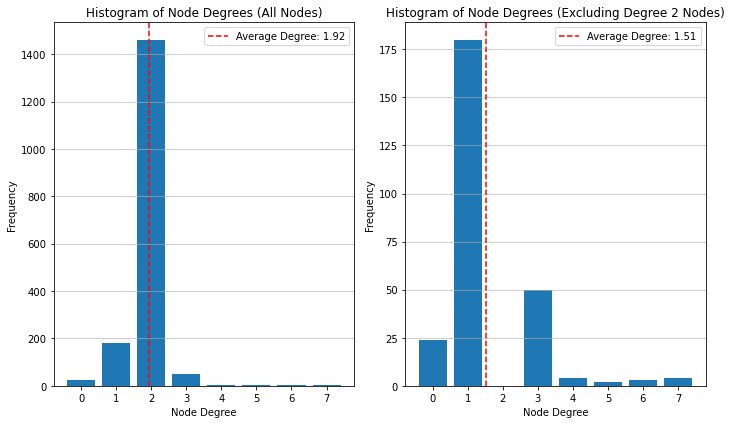

In [33]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/skeleleton_clean_x20_th5_UNET_TOP.tif")

Number of nodes: 1774
Number of edges: 1715
Average degree: 1.93
Number of branch points: 36
Number of endpoints: 155

Number of nodes of each degree:
Degree 1: 155 nodes
Degree 2: 1583 nodes
Degree 3: 35 nodes
Degree 4: 1 nodes
Average degree (excluding nodes with degree 2): 1.38


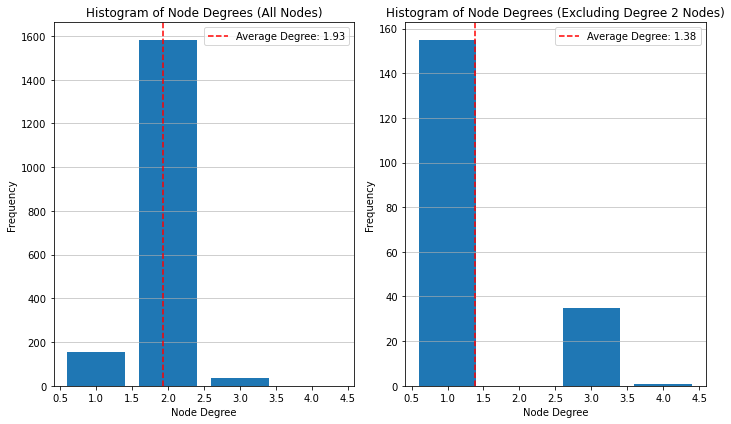

In [34]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/dilated_volume_skeleton_TOP_UNET.tif")

Number of nodes: 2388
Number of edges: 2474
Average degree: 2.07
Number of branch points: 201
Number of endpoints: 80

Number of nodes of each degree:
Degree 0: 1 nodes
Degree 1: 80 nodes
Degree 2: 2106 nodes
Degree 3: 171 nodes
Degree 4: 18 nodes
Degree 5: 5 nodes
Degree 6: 3 nodes
Degree 7: 4 nodes
Average degree (excluding nodes with degree 2): 2.61


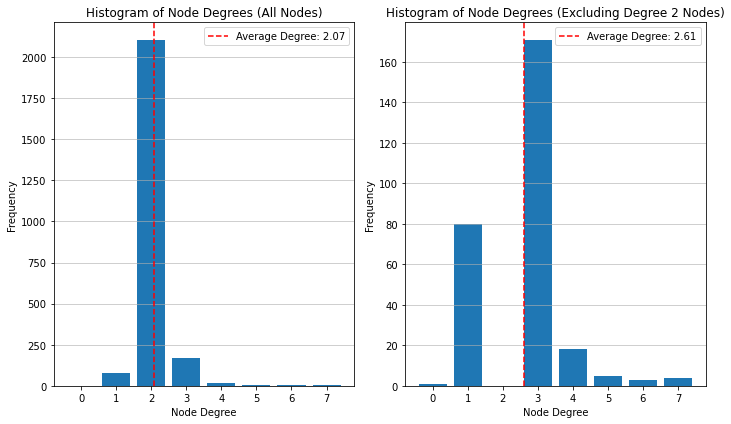

In [35]:
analyze_skeleton("../tros_skeleton_nerea/final/FINAL/connected_blobs_UNET_TOP.tif")

### with tol = 1.5

Skeleton 1 has 326 points.
Skeleton 2 has 2731 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1213 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1329 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1281 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1704 points.

Analysis Results:
  Reference Skeleton Comparison Skeleton  Number of Matchings  \
0         Skeleton 1          Skeleton 2                  188   
1         Skeleton 1          Skeleton 2                  138   
2         Skeleton 1          Skeleton 2                  150   
3         Skeleton 1          Skeleton 2                  168   
4         Skeleton 1          Skeleton 2                  160   

   Percentage of Matchings (Ref)  Percentage of Matchings (Comp)  \
0                      57.668712                        6.883925   
1                      42.331288                       11.376752   
2                      46.012270                       11.286682   
3                      51.533742           

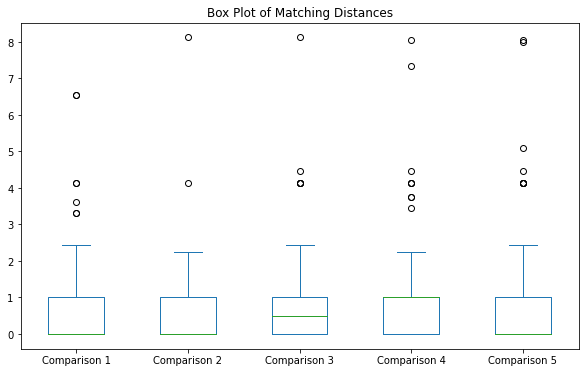

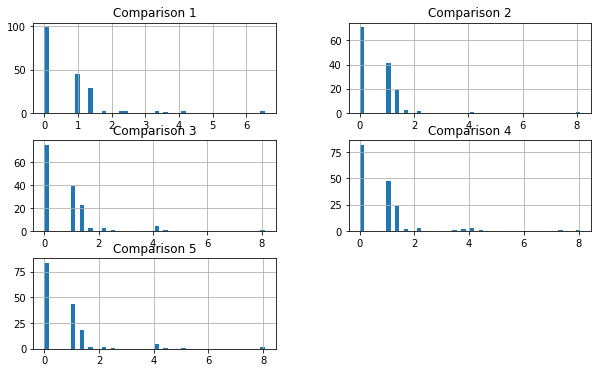

Tolerance based on 95th percentile: 4.123105625617661
Tolerance based on 75th percentile: 1.0
Tolerance based on twice the standard deviation: 2.222196663773736
Tolerance based on 1.5: 1.5
Skeleton 1 has 326 points.
Skeleton 2 has 2731 points.
Skeleton 1 has 326 points.
Skeleton 2 has 2731 points.
Skeleton 1 has 326 points.
Skeleton 2 has 2731 points.
Skeleton 1 has 326 points.
Skeleton 2 has 2731 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1213 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1213 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1213 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1213 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1329 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1329 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1329 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1329 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1281 points.
Skeleton 1 has 326 points.
Skeleton 2 has 1281 points.
Skeleton 1 has 326 points.
Skeleton 2 has

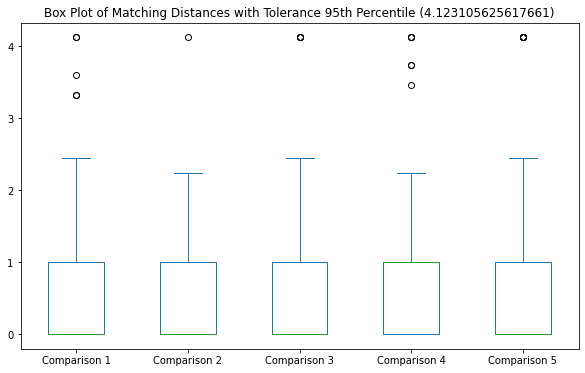

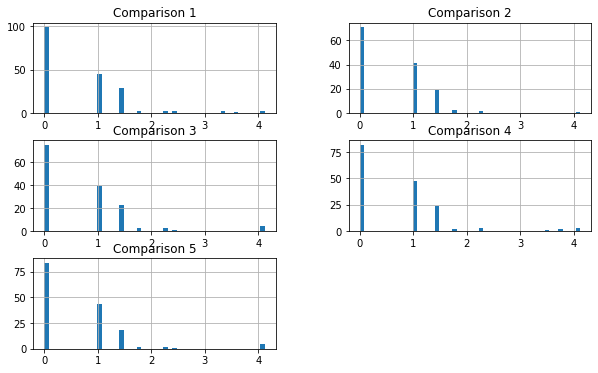

       Comparison 1  Comparison 2  Comparison 3  Comparison 4  Comparison 5
count    186.000000    137.000000    148.000000    165.000000    156.000000
mean       0.652153      0.596069      0.691711      0.699577      0.643956
std        0.834698      0.698339      0.873601      0.880852      0.888311
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      1.000000      0.000000
75%        1.000000      1.000000      1.000000      1.000000      1.000000
max        4.123106      4.123106      4.123106      4.123106      4.123106

Analysis Results with Tolerance 75th Percentile (1.0):
  Reference Skeleton Comparison Skeleton  Number of Matchings  \
0         Skeleton 1          Skeleton 2                  144   
1         Skeleton 1          Skeleton 2                  112   
2         Skeleton 1          Skeleton 2                  114   


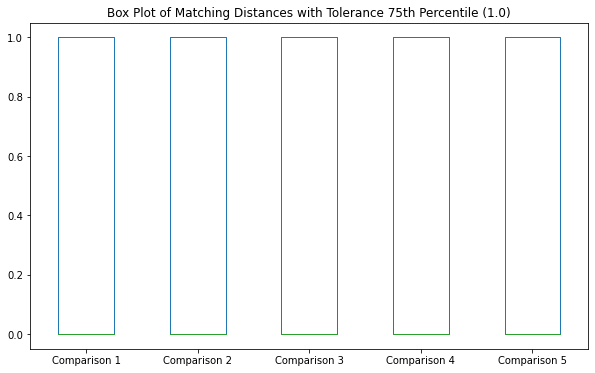

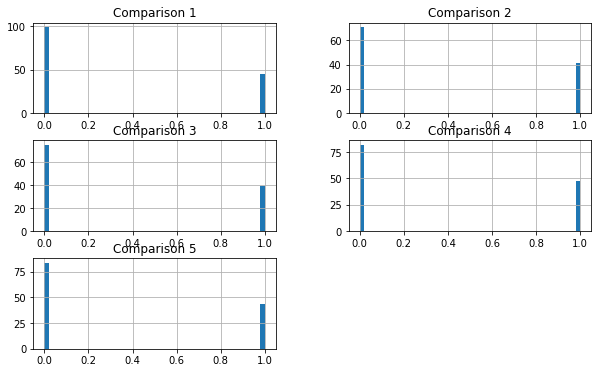

       Comparison 1  Comparison 2  Comparison 3  Comparison 4  Comparison 5
count     144.00000    112.000000    114.000000    130.000000    128.000000
mean        0.31250      0.366071      0.342105      0.369231      0.343750
std         0.46513      0.483894      0.476509      0.484463      0.476825
min         0.00000      0.000000      0.000000      0.000000      0.000000
25%         0.00000      0.000000      0.000000      0.000000      0.000000
50%         0.00000      0.000000      0.000000      0.000000      0.000000
75%         1.00000      1.000000      1.000000      1.000000      1.000000
max         1.00000      1.000000      1.000000      1.000000      1.000000

Analysis Results with Tolerance Twice Standard Deviation (2.222196663773736):
  Reference Skeleton Comparison Skeleton  Number of Matchings  \
0         Skeleton 1          Skeleton 2                  176   
1         Skeleton 1          Skeleton 2                  134   
2         Skeleton 1          Skeleton 2  

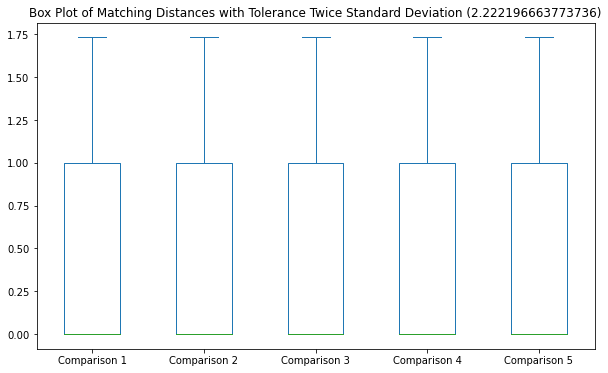

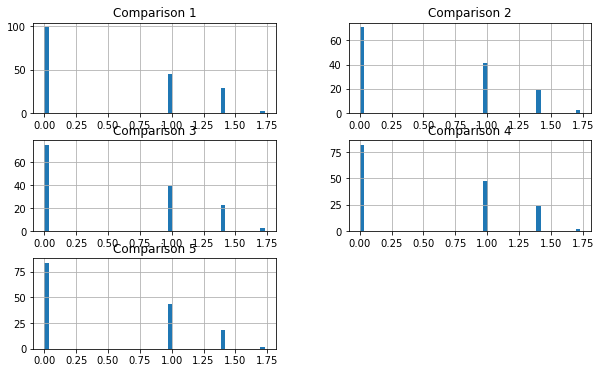

       Comparison 1  Comparison 2  Comparison 3  Comparison 4  Comparison 5
count    176.000000    134.000000    140.000000    156.000000    148.000000
mean       0.518229      0.545270      0.548022      0.547469      0.492702
std        0.608197      0.601747      0.611368      0.596999      0.583633
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%        1.000000      1.000000      1.000000      1.000000      1.000000
max        1.732051      1.732051      1.732051      1.732051      1.732051

Analysis Results with Tolerance 1.5 (1.5):
  Reference Skeleton Comparison Skeleton  Number of Matchings  \
0         Skeleton 1          Skeleton 2                  173   
1         Skeleton 1          Skeleton 2                  131   
2         Skeleton 1          Skeleton 2                  137   
3         Sk

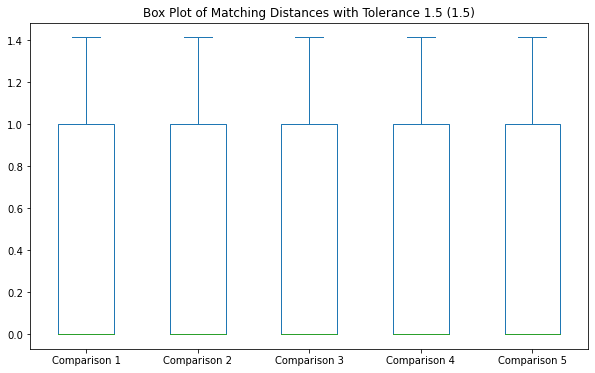

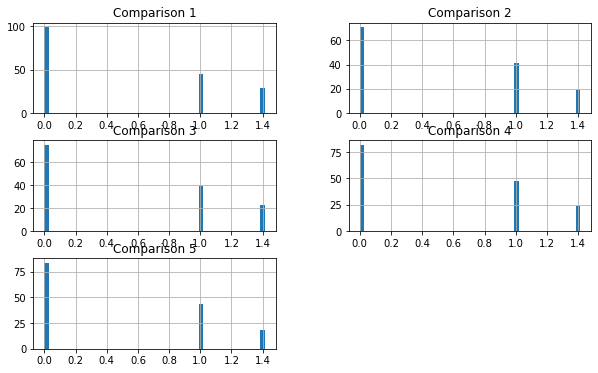

       Comparison 1  Comparison 2  Comparison 3  Comparison 4  Comparison 5
count    173.000000    131.000000    137.000000    154.000000    146.000000
mean       0.497180      0.518092      0.522094      0.532085      0.475725
std        0.591787      0.580696      0.591957      0.585223      0.569077
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%        1.000000      1.000000      1.000000      1.000000      1.000000
max        1.414214      1.414214      1.414214      1.414214      1.414214


In [36]:
# BOTTOM 
# Main analysis function to gather results into DataFrames
def main():
    results = []
    matching_distances_list = []
    
    # Example paths for analysis; replace with your actual paths or loop through multiple files.
    analyses_paths = [
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/output_volume_smaller_skeleton_UNET_BOTTOM.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/baseline_gt_UNET_BOTTOM.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/skeleleton_clean_x20_th5_UNET_BOTTOM.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/dilated_volume_skeleton_UNET_BOTTOM.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_BOTTOM.tif","../tros_skeleton_nerea/final/FINAL/connected_blobs_UNET_BOTTOM.tif"),
    ]

    max_length = 0
    for path1, path2 in analyses_paths:
        result = analyze_skeletons(path1, path2)
        results.append(result)
        matching_distances_list.append(result['Matching Distances'])
        max_length = max(max_length, len(result['Matching Distances']))

    # Create a DataFrame from the results and display it as a table
    df_results = pd.DataFrame(results)
    
    # Create a separate DataFrame for matching distances
    padded_matching_distances = [distances + [np.nan] * (max_length - len(distances)) for distances in matching_distances_list]
    df_matching_distances = pd.DataFrame(padded_matching_distances).T

    # Rename columns based on comparisons
    df_matching_distances.columns = [f"Comparison {i+1}" for i in range(len(analyses_paths))]

    print("\nAnalysis Results:")
    print(df_results)
    
    print("\nMatching Distances:")
    print(df_matching_distances)
    
    summary_stats = df_matching_distances.describe()
    print(summary_stats)

    import matplotlib.pyplot as plt

    # Box plot
    df_matching_distances.plot(kind='box', figsize=(10, 6))
    plt.title('Box Plot of Matching Distances')
    plt.show()

    # Histogram
    df_matching_distances.hist(figsize=(10, 6), bins=50)
    plt.title('Histogram of Matching Distances')
    plt.show()

    # Determine the tolerances
    tolerance_95th = df_matching_distances.quantile(0.95).max()
    tolerance_75th = df_matching_distances.quantile(0.75).max()
    tolerance_2std = 2 * df_matching_distances.std().mean()
    tolerance_15 = 1.5
    
    print(f"Tolerance based on 95th percentile: {tolerance_95th}")
    print(f"Tolerance based on 75th percentile: {tolerance_75th}")
    print(f"Tolerance based on twice the standard deviation: {tolerance_2std}")
    print(f"Tolerance based on 1.5: {tolerance_15}")
    
    # Perform matching analysis with tolerances
    results_with_tolerances = {
        f'Tolerance 95th Percentile ({tolerance_95th})': [],
        f'Tolerance 75th Percentile ({tolerance_75th})': [],
        f'Tolerance Twice Standard Deviation ({tolerance_2std})': [],
        f'Tolerance 1.5 ({tolerance_15})': [],

    }

    for path1, path2 in analyses_paths:
        results_with_tolerances[f'Tolerance 95th Percentile ({tolerance_95th})'].append(analyze_skeletons_with_tolerance(path1, path2, tolerance_95th))

        results_with_tolerances[f'Tolerance 75th Percentile ({tolerance_75th})'].append(analyze_skeletons_with_tolerance(path1, path2, tolerance_75th))

        results_with_tolerances[f'Tolerance Twice Standard Deviation ({tolerance_2std})'].append(analyze_skeletons_with_tolerance(path1, path2, tolerance_2std))
        
        results_with_tolerances[f'Tolerance 1.5 ({tolerance_15})'].append(analyze_skeletons_with_tolerance(path1, path2, tolerance_15))

    # Create DataFrames for each tolerance
    dfs_with_tolerances = {}
    for tolerance_name, tolerance_results in results_with_tolerances.items():
        dfs_with_tolerances[tolerance_name] = pd.DataFrame(tolerance_results)

    # Print and visualize results for each tolerance
    for tolerance_name, df in dfs_with_tolerances.items():
        print(f"\nAnalysis Results with {tolerance_name}:")
        print(df)

        # Extract matching distances for each tolerance
        matching_distances_list = df['Matching Distances'].tolist()
        max_length = max(len(distances) for distances in matching_distances_list)
        padded_matching_distances = [distances + [np.nan] * (max_length - len(distances)) for distances in matching_distances_list]

        df_matching_distances_with_tolerance = pd.DataFrame(padded_matching_distances).T
        df_matching_distances_with_tolerance.columns = [f"Comparison {i+1}" for i in range(len(analyses_paths))]

        # Box plot
        df_matching_distances_with_tolerance.plot(kind='box', figsize=(10, 6))
        plt.title(f'Box Plot of Matching Distances with {tolerance_name}')
        plt.show()

        # Histogram
        df_matching_distances_with_tolerance.hist(figsize=(10, 6), bins=50)
        plt.title(f'Histogram of Matching Distances with {tolerance_name}')
        plt.show()

        # Summary statistics
        summary_stats = df_matching_distances_with_tolerance.describe()
        print(summary_stats)

# Example usage
if __name__ == "__main__":
    main()

Skeleton 1 has 1902 points.
Skeleton 2 has 2224 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1309 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1728 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1774 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 2388 points.

Analysis Results:
  Reference Skeleton Comparison Skeleton  Number of Matchings  \
0         Skeleton 1          Skeleton 2                 1212   
1         Skeleton 1          Skeleton 2                  800   
2         Skeleton 1          Skeleton 2                 1119   
3         Skeleton 1          Skeleton 2                 1109   
4         Skeleton 1          Skeleton 2                 1162   

   Percentage of Matchings (Ref)  Percentage of Matchings (Comp)  \
0                      63.722397                       54.496403   
1                      42.060988                       61.115355   
2                      58.832808                       64.756944   
3                      58.307045      

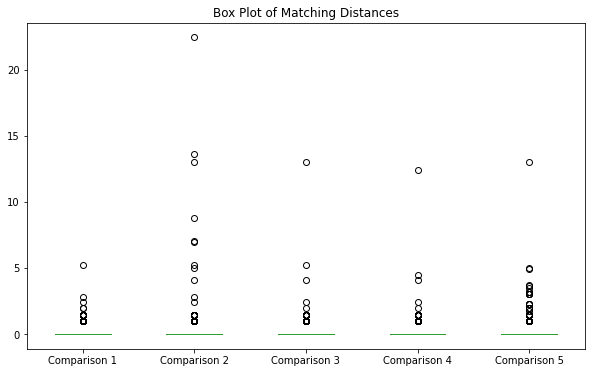

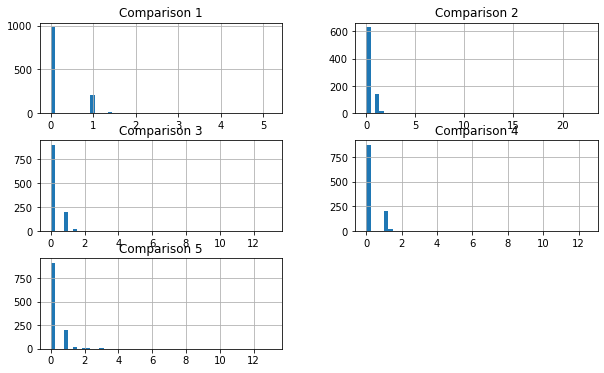

Tolerance based on 95th percentile: 1.0
Tolerance based on 75th percentile: 0.0
Tolerance based on twice the standard deviation: 1.4133570453937652
Tolerance based on 1.5: 1.5
Skeleton 1 has 1902 points.
Skeleton 2 has 2224 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 2224 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 2224 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 2224 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1309 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1309 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1309 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1309 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1728 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1728 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1728 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1728 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1774 points.
Skeleton 1 has 1902 points.
Skeleton 2 has 1774 points.
Skeleton 1 has 1902 points.
Skeleton 2 h

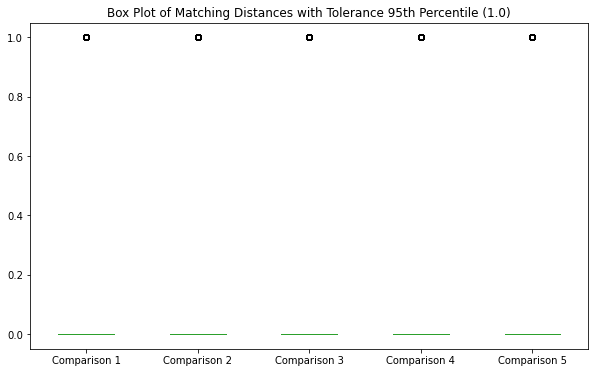

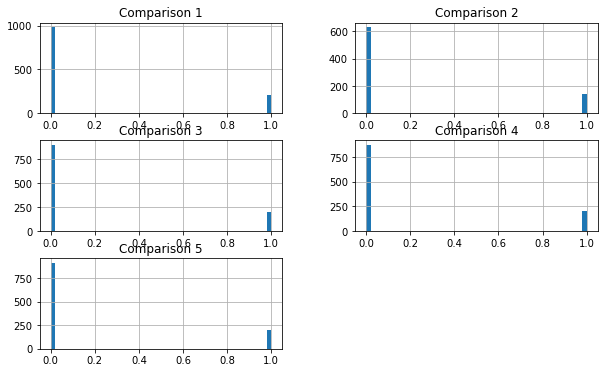

       Comparison 1  Comparison 2  Comparison 3  Comparison 4  Comparison 5
count   1193.000000    776.000000   1098.000000   1083.000000   1123.000000
mean       0.175189      0.184278      0.181239      0.191136      0.182547
std        0.380288      0.387961      0.385391      0.393377      0.386467
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000      0.000000      0.000000
max        1.000000      1.000000      1.000000      1.000000      1.000000

Analysis Results with Tolerance 75th Percentile (0.0):
  Reference Skeleton Comparison Skeleton  Number of Matchings  \
0         Skeleton 1          Skeleton 2                  984   
1         Skeleton 2          Skeleton 1                  633   
2         Skeleton 2          Skeleton 1                  899   


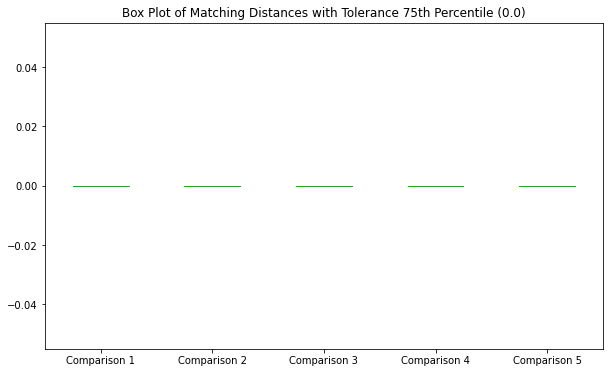

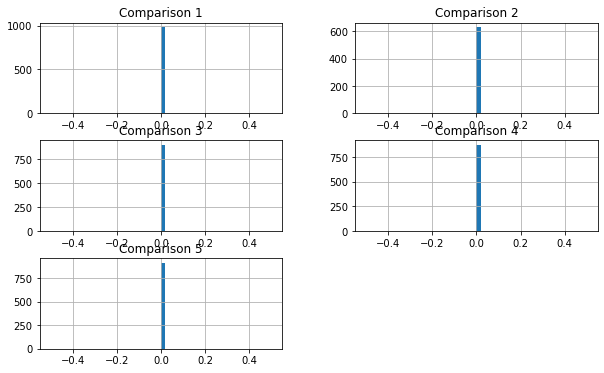

       Comparison 1  Comparison 2  Comparison 3  Comparison 4  Comparison 5
count         984.0         633.0         899.0         876.0         918.0
mean            0.0           0.0           0.0           0.0           0.0
std             0.0           0.0           0.0           0.0           0.0
min             0.0           0.0           0.0           0.0           0.0
25%             0.0           0.0           0.0           0.0           0.0
50%             0.0           0.0           0.0           0.0           0.0
75%             0.0           0.0           0.0           0.0           0.0
max             0.0           0.0           0.0           0.0           0.0

Analysis Results with Tolerance Twice Standard Deviation (1.4133570453937652):
  Reference Skeleton Comparison Skeleton  Number of Matchings  \
0         Skeleton 1          Skeleton 2                 1193   
1         Skeleton 2          Skeleton 1                  776   
2         Skeleton 2          Skeleton 1 

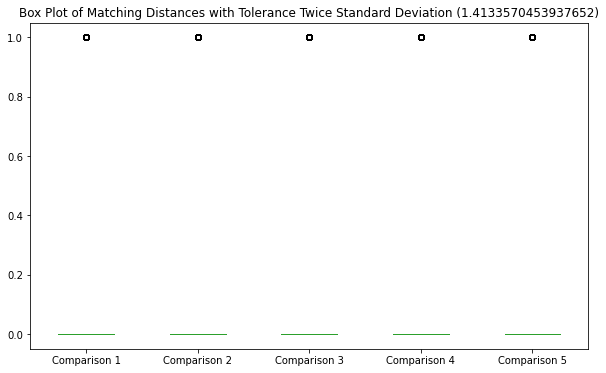

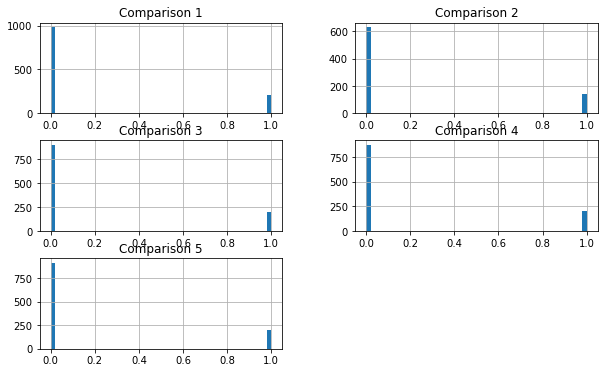

       Comparison 1  Comparison 2  Comparison 3  Comparison 4  Comparison 5
count   1193.000000    776.000000   1098.000000   1083.000000   1123.000000
mean       0.175189      0.184278      0.181239      0.191136      0.182547
std        0.380288      0.387961      0.385391      0.393377      0.386467
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000      0.000000      0.000000
max        1.000000      1.000000      1.000000      1.000000      1.000000

Analysis Results with Tolerance 1.5 (1.5):
  Reference Skeleton Comparison Skeleton  Number of Matchings  \
0         Skeleton 1          Skeleton 2                 1207   
1         Skeleton 2          Skeleton 1                  789   
2         Skeleton 2          Skeleton 1                 1114   
3         Sk

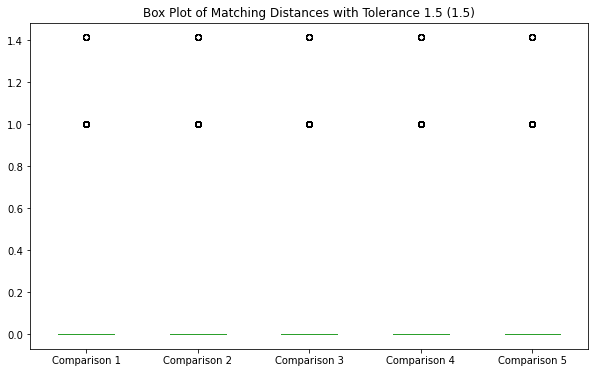

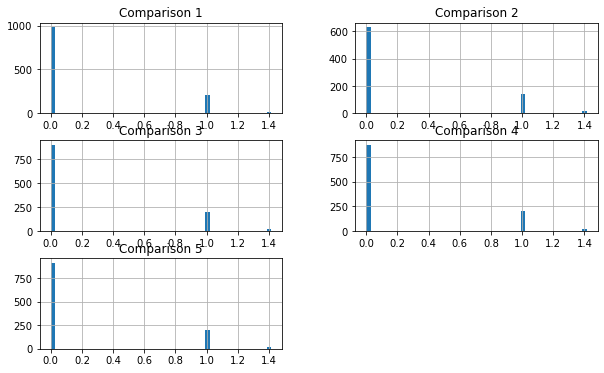

       Comparison 1  Comparison 2  Comparison 3  Comparison 4  Comparison 5
count   1207.000000    789.000000   1114.000000   1104.000000   1140.000000
mean       0.189560      0.204543      0.198947      0.214401      0.200914
std        0.400693      0.415423      0.409795      0.423956      0.411620
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000      0.000000      0.000000
max        1.414214      1.414214      1.414214      1.414214      1.414214


In [37]:
# TOP 
# Main analysis function to gather results into DataFrames
def main():
    results = []
    matching_distances_list = []
    
    # Example paths for analysis; replace with your actual paths or loop through multiple files.
    analyses_paths = [
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_TOP.tif","../tros_skeleton_nerea/final/FINAL/output_volume_smaller_skeleton_UNET_TOP.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_TOP.tif","../tros_skeleton_nerea/final/FINAL/baseline_gt_UNET_TOP.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_TOP.tif","../tros_skeleton_nerea/final/FINAL/skeleleton_clean_x20_th5_UNET_TOP.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_TOP.tif","../tros_skeleton_nerea/final/FINAL/dilated_volume_skeleton_TOP_UNET.tif"),
        ("../tros_skeleton_nerea/final/FINAL/connected_blobs_TOP.tif","../tros_skeleton_nerea/final/FINAL/connected_blobs_UNET_TOP.tif"),
    ]


    max_length = 0
    for path1, path2 in analyses_paths:
        result = analyze_skeletons(path1, path2)
        results.append(result)
        matching_distances_list.append(result['Matching Distances'])
        max_length = max(max_length, len(result['Matching Distances']))

    # Create a DataFrame from the results and display it as a table
    df_results = pd.DataFrame(results)
    
    # Create a separate DataFrame for matching distances
    padded_matching_distances = [distances + [np.nan] * (max_length - len(distances)) for distances in matching_distances_list]
    df_matching_distances = pd.DataFrame(padded_matching_distances).T

    # Rename columns based on comparisons
    df_matching_distances.columns = [f"Comparison {i+1}" for i in range(len(analyses_paths))]

    print("\nAnalysis Results:")
    print(df_results)
    
    print("\nMatching Distances:")
    print(df_matching_distances)
    
    summary_stats = df_matching_distances.describe()
    print(summary_stats)

    import matplotlib.pyplot as plt

    # Box plot
    df_matching_distances.plot(kind='box', figsize=(10, 6))
    plt.title('Box Plot of Matching Distances')
    plt.show()

    # Histogram
    df_matching_distances.hist(figsize=(10, 6), bins=50)
    plt.title('Histogram of Matching Distances')
    plt.show()

    # Determine the tolerances
    tolerance_95th = df_matching_distances.quantile(0.95).max()
    tolerance_75th = df_matching_distances.quantile(0.75).max()
    tolerance_2std = 2 * df_matching_distances.std().mean()
    tolerance_15 = 1.5
    
    print(f"Tolerance based on 95th percentile: {tolerance_95th}")
    print(f"Tolerance based on 75th percentile: {tolerance_75th}")
    print(f"Tolerance based on twice the standard deviation: {tolerance_2std}")
    print(f"Tolerance based on 1.5: {tolerance_15}")
    
    # Perform matching analysis with tolerances
    results_with_tolerances = {
        f'Tolerance 95th Percentile ({tolerance_95th})': [],
        f'Tolerance 75th Percentile ({tolerance_75th})': [],
        f'Tolerance Twice Standard Deviation ({tolerance_2std})': [],
        f'Tolerance 1.5 ({tolerance_15})': [],

    }

    for path1, path2 in analyses_paths:
        results_with_tolerances[f'Tolerance 95th Percentile ({tolerance_95th})'].append(analyze_skeletons_with_tolerance(path1, path2, tolerance_95th))

        results_with_tolerances[f'Tolerance 75th Percentile ({tolerance_75th})'].append(analyze_skeletons_with_tolerance(path1, path2, tolerance_75th))

        results_with_tolerances[f'Tolerance Twice Standard Deviation ({tolerance_2std})'].append(analyze_skeletons_with_tolerance(path1, path2, tolerance_2std))
        
        results_with_tolerances[f'Tolerance 1.5 ({tolerance_15})'].append(analyze_skeletons_with_tolerance(path1, path2, tolerance_15))

    # Create DataFrames for each tolerance
    dfs_with_tolerances = {}
    for tolerance_name, tolerance_results in results_with_tolerances.items():
        dfs_with_tolerances[tolerance_name] = pd.DataFrame(tolerance_results)

    # Print and visualize results for each tolerance
    for tolerance_name, df in dfs_with_tolerances.items():
        print(f"\nAnalysis Results with {tolerance_name}:")
        print(df)

        # Extract matching distances for each tolerance
        matching_distances_list = df['Matching Distances'].tolist()
        max_length = max(len(distances) for distances in matching_distances_list)
        padded_matching_distances = [distances + [np.nan] * (max_length - len(distances)) for distances in matching_distances_list]

        df_matching_distances_with_tolerance = pd.DataFrame(padded_matching_distances).T
        df_matching_distances_with_tolerance.columns = [f"Comparison {i+1}" for i in range(len(analyses_paths))]

        # Box plot
        df_matching_distances_with_tolerance.plot(kind='box', figsize=(10, 6))
        plt.title(f'Box Plot of Matching Distances with {tolerance_name}')
        plt.show()

        # Histogram
        df_matching_distances_with_tolerance.hist(figsize=(10, 6), bins=50)
        plt.title(f'Histogram of Matching Distances with {tolerance_name}')
        plt.show()

        # Summary statistics
        summary_stats = df_matching_distances_with_tolerance.describe()
        print(summary_stats)

# Example usage
if __name__ == "__main__":
    main()